In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import miceforest as mf  #填补缺失值
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import sklearn.metrics as metrics
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
data = pd.read_excel(r'D:\data\联川\work3.xlsx')
data.shape, (data.isnull().sum(axis=0) /
             data.shape[0]).sort_values(ascending=False).head(30), data.columns

((83, 5946),
 Symbol      0.0
 ARID1B      0.0
 TOR1AIP2    0.0
 NBEA        0.0
 GPRC5A      0.0
 ENGASE      0.0
 REPS2       0.0
 NUP35       0.0
 NUP37       0.0
 NUP43       0.0
 FLAD1       0.0
 BOD1L1      0.0
 NUBPL       0.0
 USP32       0.0
 SYNE1       0.0
 DOCK8       0.0
 LPCAT1      0.0
 FBXO22      0.0
 VPS37A      0.0
 PPHLN1      0.0
 SPATA4      0.0
 NAV1        0.0
 TSTD1       0.0
 ABHD11      0.0
 CMAS        0.0
 TSPAN14     0.0
 SPATA20     0.0
 CXorf38     0.0
 NPLOC4      0.0
 SMARCC2     0.0
 dtype: float64,
 Index(['Symbol', 'NUDT4B', 'GATD3', 'PNMA6E', 'GNG5B', 'RBM47', 'UBA6',
        'ESYT2', 'SHTN1', 'PXDNL',
        ...
        'FCGBP', 'SCIN', 'DDX49', 'CAPN7', 'WASF2', 'ENPP4', 'ZHX2', 'MORC2',
        'SEC23IP', 'subtype'],
       dtype='object', length=5946))

In [55]:
# 进行特征筛选
selectX = data[['NCOA5'
]]
selectY = data["subtype"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(selectX,
                                                selectY,
                                               test_size=0.2,
                                                random_state=50)

In [ ]:
'LIMCH1','MAPRE3','RUVBL2','MRPS28','WDR3','EXOC7','CORO2B','CLEC11A','FARSA','LEMD3','MACF1','TBC1D2B',
                'NIP7','TRAPPC4','PNO1','SCAF8','SMC3','GNE','BCS1L','NCKAP1','PPP6R1',
                'RTRAF','NCOA5','FZD1','USP22','SRRM2','NSFL1C','ZC3H4','SHOC2','TNN','HIGD1A','NDRG2','COG5','USP24','PA2G4'

In [3]:
over_x = data.drop(["Symbol","subtype"],axis=1)
#over_x=(over_x - over_x.min(axis=0)) / (over_x.max(axis=0) - over_x.min(axis=0))  #归一化
over_y = data["subtype"]
SXtrain, SXtest, SYtrain, SYtest = train_test_split(over_x,
                                                    over_y,
                                                    test_size=0.2,
                                                   random_state=52)

In [4]:
# 不进行特征筛选
Xtrain=SXtrain
Ytrain=SYtrain
Xtest=SXtest
Ytest=SYtest

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# 线性判别分析法（Linear Discriminant Analysis，LDA），也叫作Fisher线性判别（Fisher Linear Discriminant，FLD），是一种有监督的线性降维算法。与PCA尽可能多地保留数据信息不同，
# LDA的目标是使降维后的数据点尽可能容易被区分，使类内方差越小，类间方差越大，其利用了标签的信息。
# 两种性质：①同类的数据点尽可能接近；②不同类的数据点尽可能分开。



# 线性判别分析法，返回降维后的数据
# 参数n_compoents为降维后的特征数
data_lda = LDA(n_components=6).fit_transform(over_x, over_y)
print("data_lda:\n", data_lda)

data_lda.shape

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

# XGBoost

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import xgboost as xgb
from xgboost import XGBClassifier as XGBC

from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()#max_depth=13,reg_lambda=0.01,objective=multi:softprob",min_child_weight=0.0001
#max_depth=5,reg_alpha=0.01,objective="multi:softprob",num_class=3,min_child_weight=0.01
#reg_lambda=0.2,min_child_weight=0.1
XGB.fit(Xtrain,Ytrain) ##拟合模型

from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain,XGB.predict(Xtrain))
print('train_score',train_score)
test_score = accuracy_score(Ytest,XGB.predict(Xtest))
print('test_score',test_score)

test_predict4=XGB.predict(Xtest)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score



Ypred=XGB.predict_proba(Xtest)
score = XGB.predict_proba(Xtest)[:,1]
predict = XGB.predict(Xtest)
#fpr,tpr,thres = roc_curve(Ytest,score,average='micro')

#print("AUC:",roc_auc_score(Ytest, score)) #二分类
print("AUC:",roc_auc_score(Ytest, Ypred, multi_class='ovo'))#多分类    #average='macro'：二分类时，该参数可以忽略。用于多分类，' micro
print('Cross-entropy loss:',metrics.log_loss(Ytest, Ypred))

#交叉验证
scores = cross_val_score(XGB,Xtrain,Ytrain,cv=10)
scores.mean()

train_score 1.0
test_score 0.8235294117647058
AUC: 0.9302083333333333
Cross-entropy loss: 0.47743773427517977


0.7595238095238095

C:\Users\C\AppData\Local\Temp\ipykernel_1880\1726880783.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


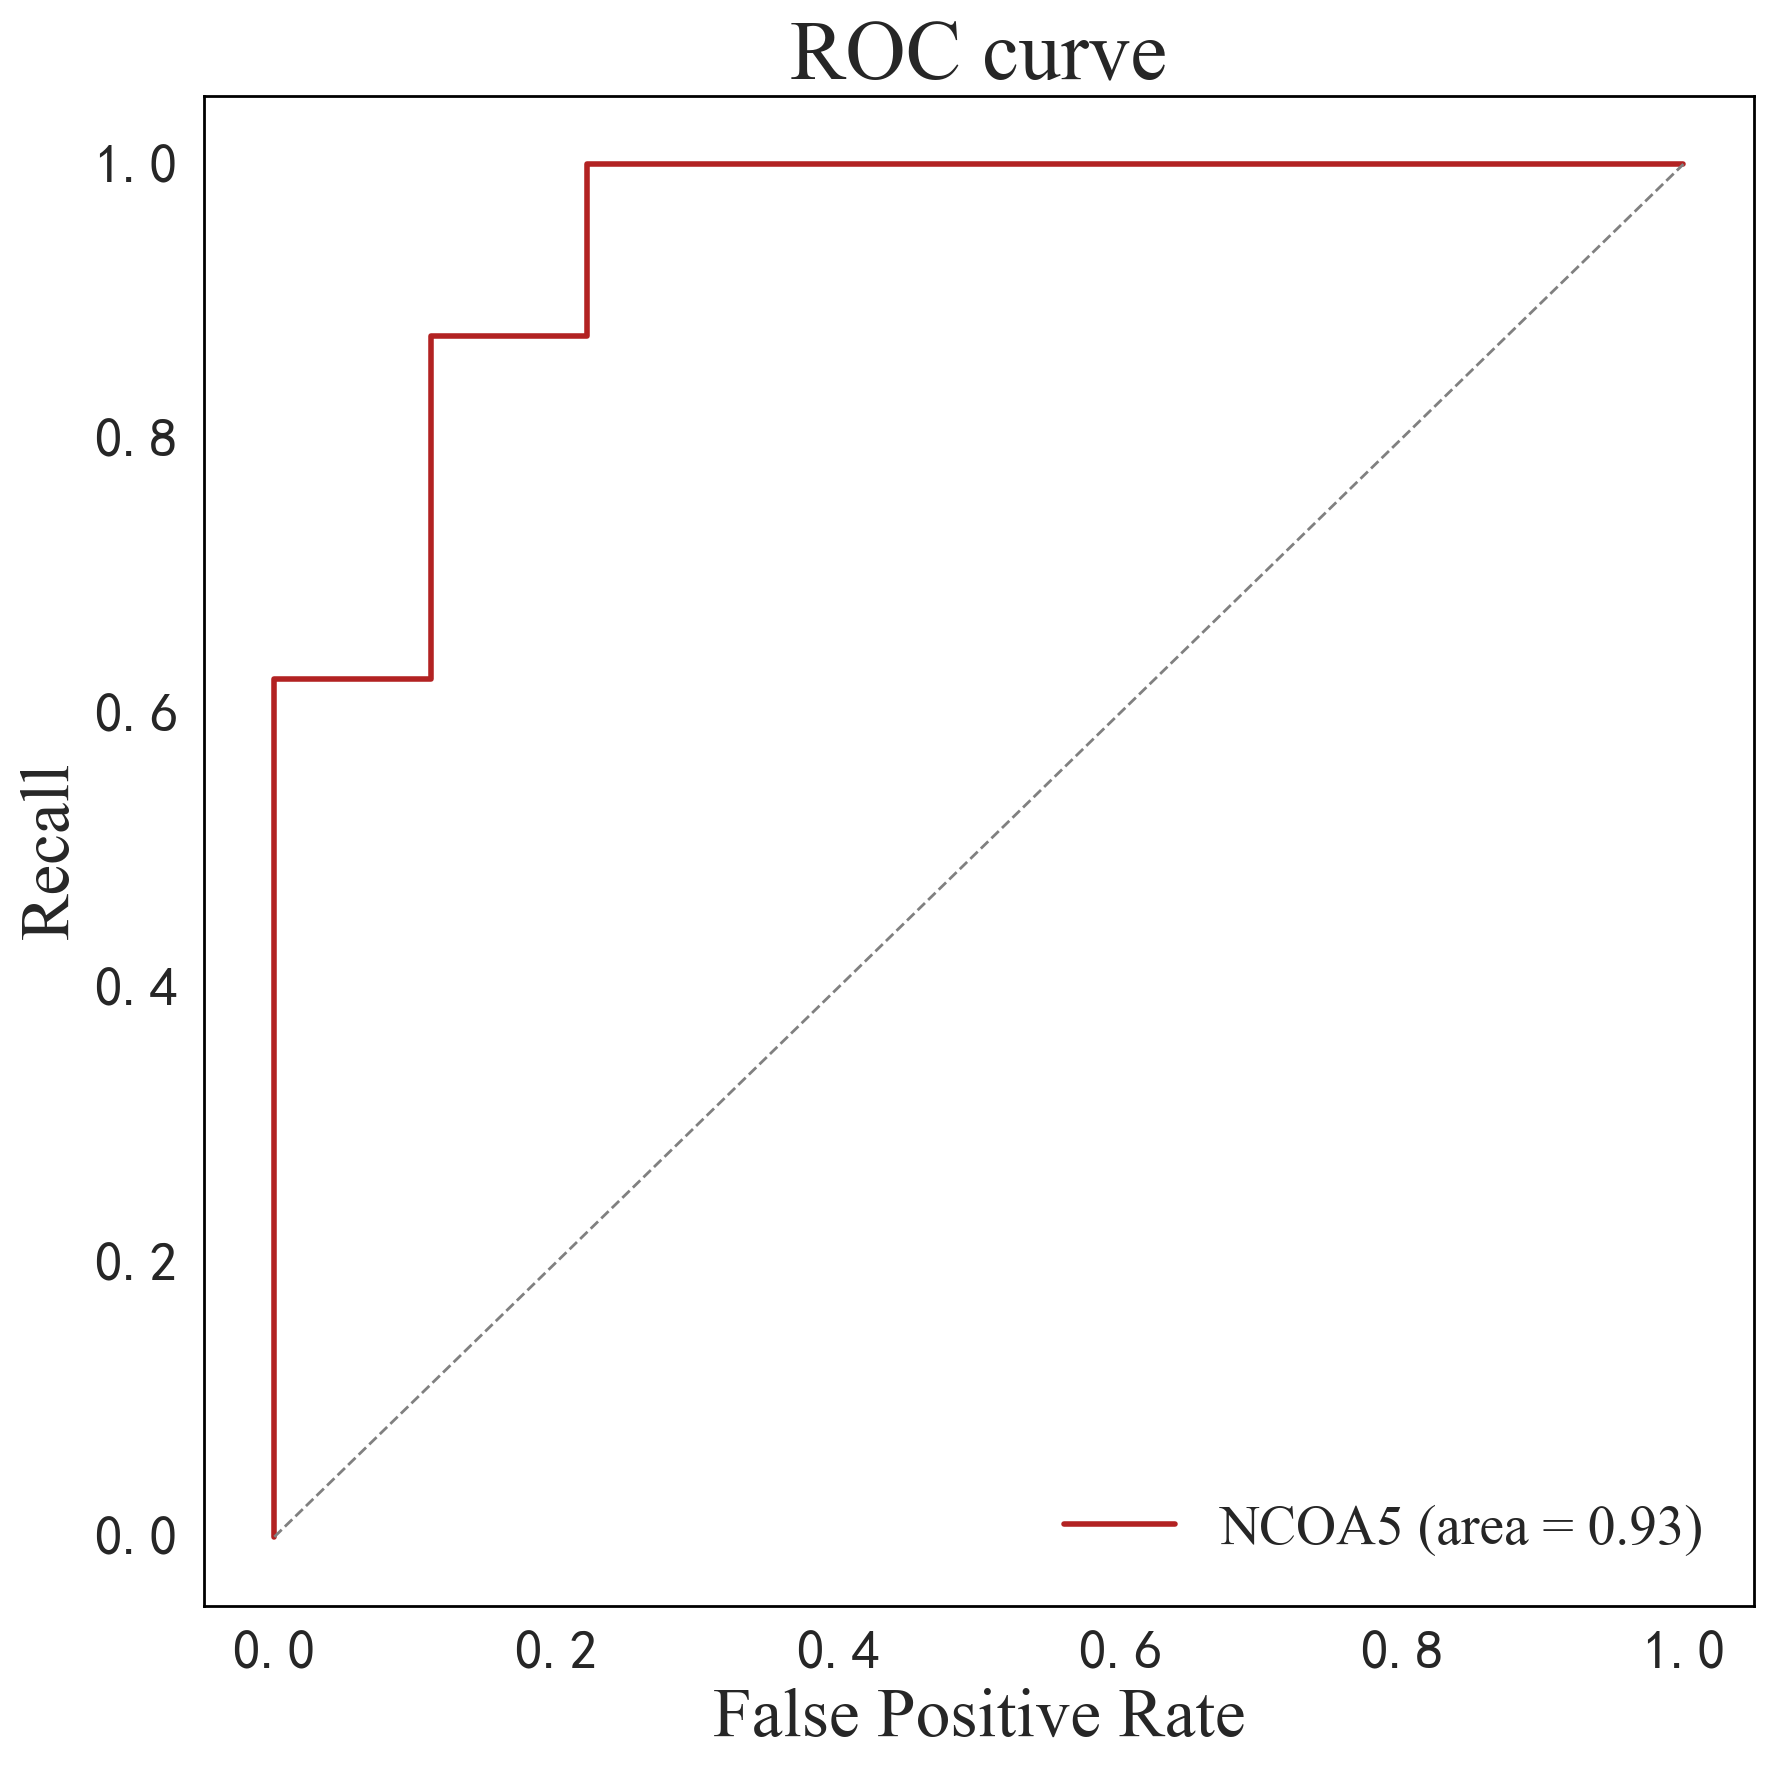

In [6]:
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

from sklearn.metrics import roc_curve
FPR,recall,thresholds=roc_curve(Ytest,XGB.predict_proba(Xtest)[:,1],pos_label=1)

from sklearn.metrics import roc_auc_score as auc
area=auc(Ytest,Ypred, multi_class='ovo')
#area=auc(Ytest,XGB.predict_proba(Xtest)[:,1])

fig=plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')



plt.plot(FPR, recall, color='firebrick',
         label='NCOA5 (area = %0.2f)'% area  ,linewidth=2.0)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--' ,linewidth=1.0)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':25
     }
font1={'family':'Times New Roman', 
      'weight':'normal',
      'size':20
     }
plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=20)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('Recall',fontdict=font)
plt.title('ROC curve',fontdict={'family':'Times New Roman',  'weight':'normal', 'size':30})
plt.legend(loc="lower right",prop = font1,facecolor='w',edgecolor='w');
#plt.grid(True,color='black',linestyle='--',alpha=0.1);
#plt.savefig(r'D:/data/联川/work3-1-8.jpg')

In [37]:
XGB.score(Xtest,Ytest),sorted([*zip(Xtrain.columns,XGB.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

(1.0,
 [('RYBP', 0.24362047),
  ('SRCAP', 0.2426467),
  ('STX18', 0.11356722),
  ('NCOA5', 0.10754393),
  ('HPX', 0.10297886),
  ('ACBD6', 0.044078764),
  ('GPN1', 0.030221665),
  ('CCL21', 0.028708057),
  ('GNG5B', 0.026855376),
  ('ZNF326', 0.021778742),
  ('GNG7', 0.017474927),
  ('ESYT2', 0.007976273),
  ('COTL1', 0.0055311825),
  ('UBFD1', 0.0051101656),
  ('TRMT2A', 0.0018407626),
  ('CFAP43', 6.698364e-05),
  ('NUDT4B', 0.0),
  ('GATD3', 0.0),
  ('PNMA6E', 0.0),
  ('RBM47', 0.0),
  ('UBA6', 0.0),
  ('SHTN1', 0.0),
  ('PXDNL', 0.0),
  ('ILVBL', 0.0),
  ('SSC5D', 0.0),
  ('SH3PXD2B', 0.0),
  ('NBAS', 0.0),
  ('VWA8', 0.0),
  ('SBNO1', 0.0),
  ('WDR91', 0.0),
  ('DENND11', 0.0),
  ('EFCAB5', 0.0),
  ('XIRP2', 0.0),
  ('VPS37C', 0.0),
  ('ANKRD34B', 0.0),
  ('TRAPPC13', 0.0),
  ('CNOT1', 0.0),
  ('MAP1LC3B', 0.0),
  ('PGP', 0.0),
  ('RIMOC1', 0.0),
  ('TCAF2', 0.0),
  ('MFSD2B', 0.0),
  ('TUBAL3', 0.0),
  ('FBLL1', 0.0),
  ('SMCHD1', 0.0),
  ('NCF1B', 0.0),
  ('UNC119B', 0.0),
  ('R

In [21]:
XGB.get_booster().get_score(importance_type='weight')

{'NUDT4B': 1.0,
 'DENND11': 1.0,
 'NCF1B': 1.0,
 'SPTBN2': 1.0,
 'CCNK': 1.0,
 'SCAF4': 1.0,
 'GC': 1.0,
 'HPX': 1.0,
 'A1BG': 1.0,
 'C8B': 1.0,
 'NUP107': 1.0,
 'CTR9': 1.0,
 'ILKAP': 3.0,
 'OLFML3': 1.0,
 'GTF3C5': 3.0}

[0]	validation_0-merror:0.01515	validation_0-mlogloss:0.80542	validation_1-merror:0.41176	validation_1-mlogloss:0.96731
[1]	validation_0-merror:0.01515	validation_0-mlogloss:0.61387	validation_1-merror:0.23529	validation_1-mlogloss:0.83894
[2]	validation_0-merror:0.00000	validation_0-mlogloss:0.48056	validation_1-merror:0.23529	validation_1-mlogloss:0.78807
[3]	validation_0-merror:0.00000	validation_0-mlogloss:0.38142	validation_1-merror:0.23529	validation_1-mlogloss:0.72713
[4]	validation_0-merror:0.00000	validation_0-mlogloss:0.31024	validation_1-merror:0.29412	validation_1-mlogloss:0.72456
[5]	validation_0-merror:0.00000	validation_0-mlogloss:0.25214	validation_1-merror:0.29412	validation_1-mlogloss:0.67578
[6]	validation_0-merror:0.00000	validation_0-mlogloss:0.20859	validation_1-merror:0.29412	validation_1-mlogloss:0.65211
[7]	validation_0-merror:0.00000	validation_0-mlogloss:0.17363	validation_1-merror:0.29412	validation_1-mlogloss:0.63695
[8]	validation_0-merror:0.00000	validati

[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.02578	validation_1-merror:0.17647	validation_1-mlogloss:0.59474
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.02568	validation_1-merror:0.17647	validation_1-mlogloss:0.59446
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.02559	validation_1-merror:0.17647	validation_1-mlogloss:0.59618
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.02549	validation_1-merror:0.17647	validation_1-mlogloss:0.59338
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.02539	validation_1-merror:0.17647	validation_1-mlogloss:0.59492
[73]	validation_0-merror:0.00000	validation_0-mlogloss:0.02531	validation_1-merror:0.17647	validation_1-mlogloss:0.59339
[74]	validation_0-merror:0.00000	validation_0-mlogloss:0.02521	validation_1-merror:0.17647	validation_1-mlogloss:0.59519
[75]	validation_0-merror:0.00000	validation_0-mlogloss:0.02513	validation_1-merror:0.17647	validation_1-mlogloss:0.59267
[76]	validation_0-merror:0.00000

C:\Users\C\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\C\AppData\Local\Temp\ipykernel_25400\1459907913.py:38: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


Accuracy: 82.35%


C:\Users\C\AppData\Local\Temp\ipykernel_25400\1459907913.py:59: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


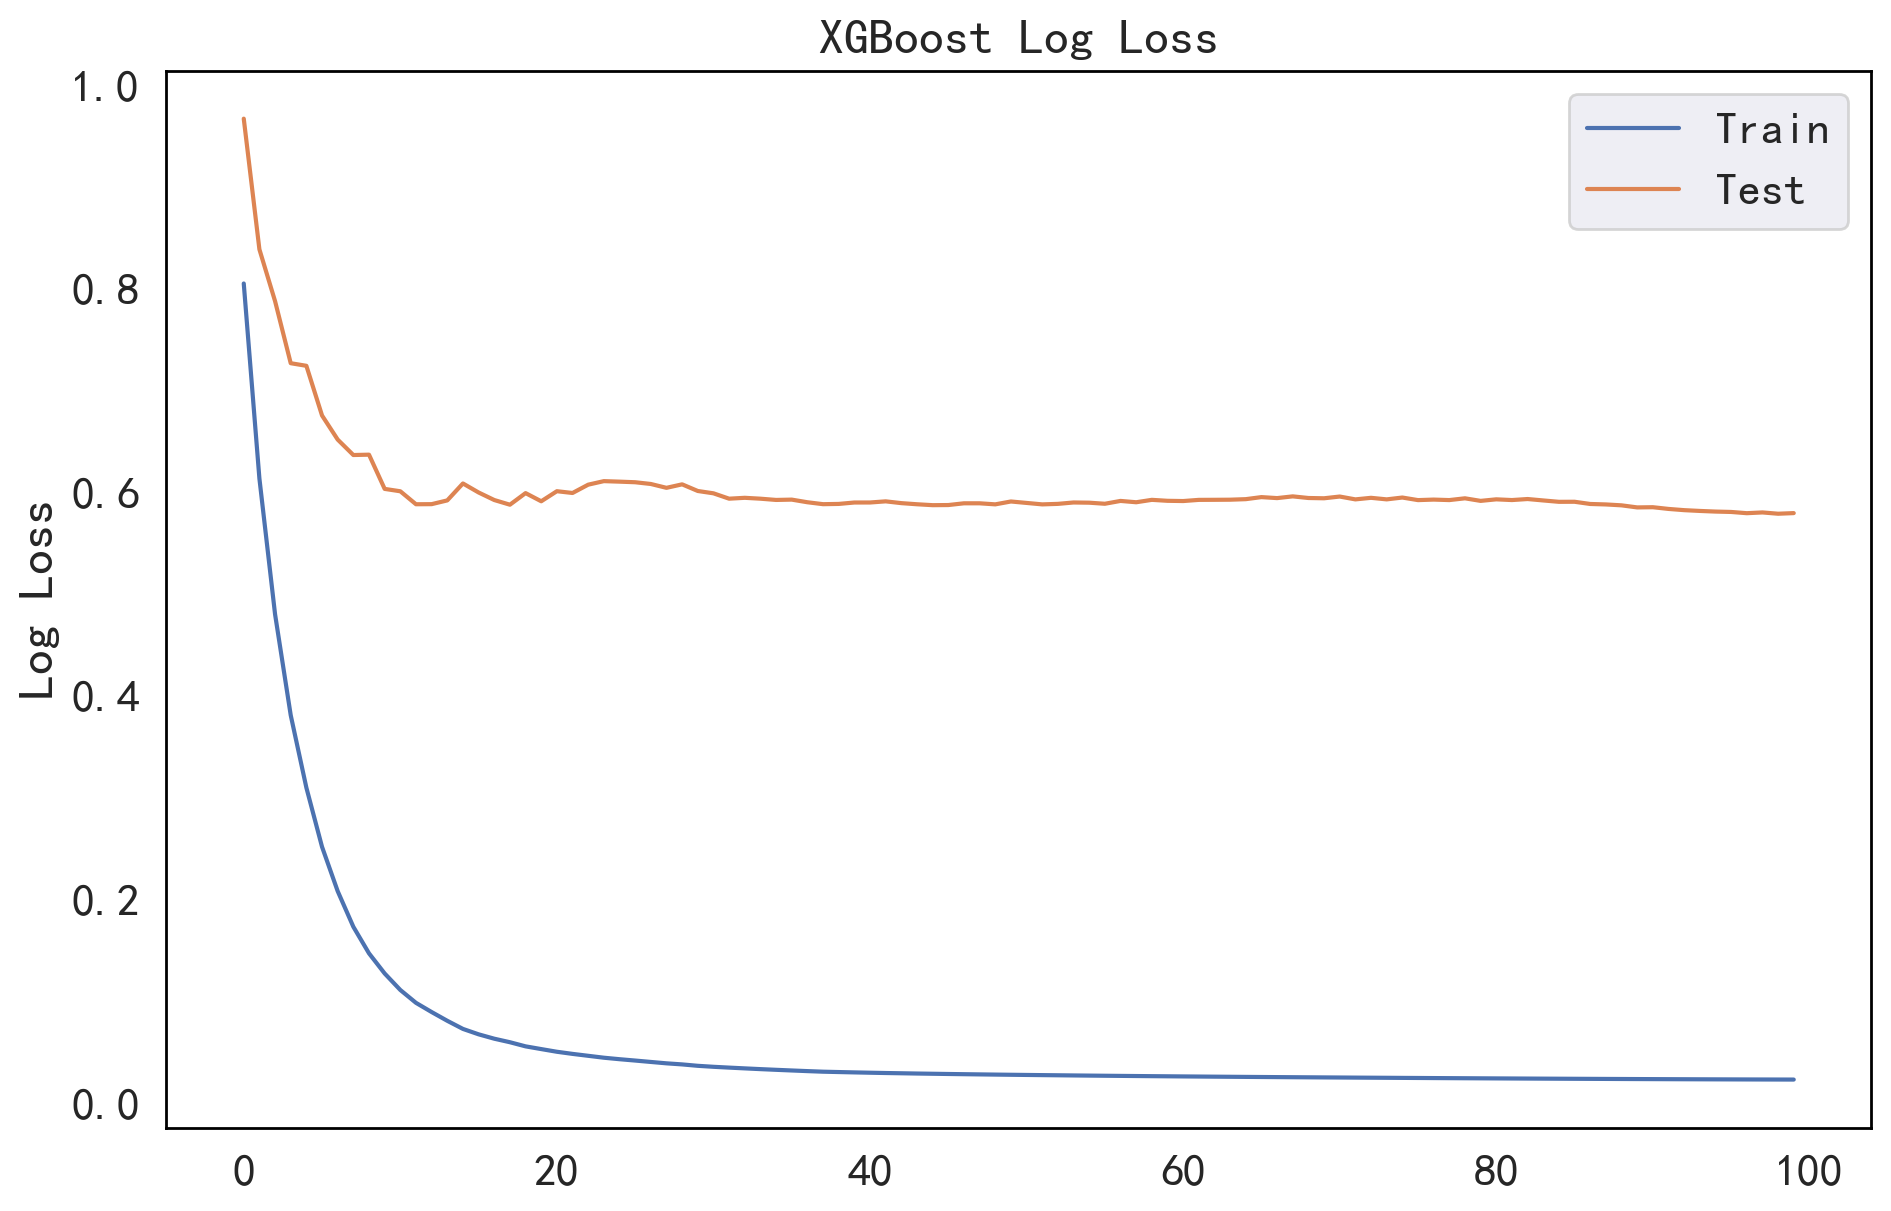

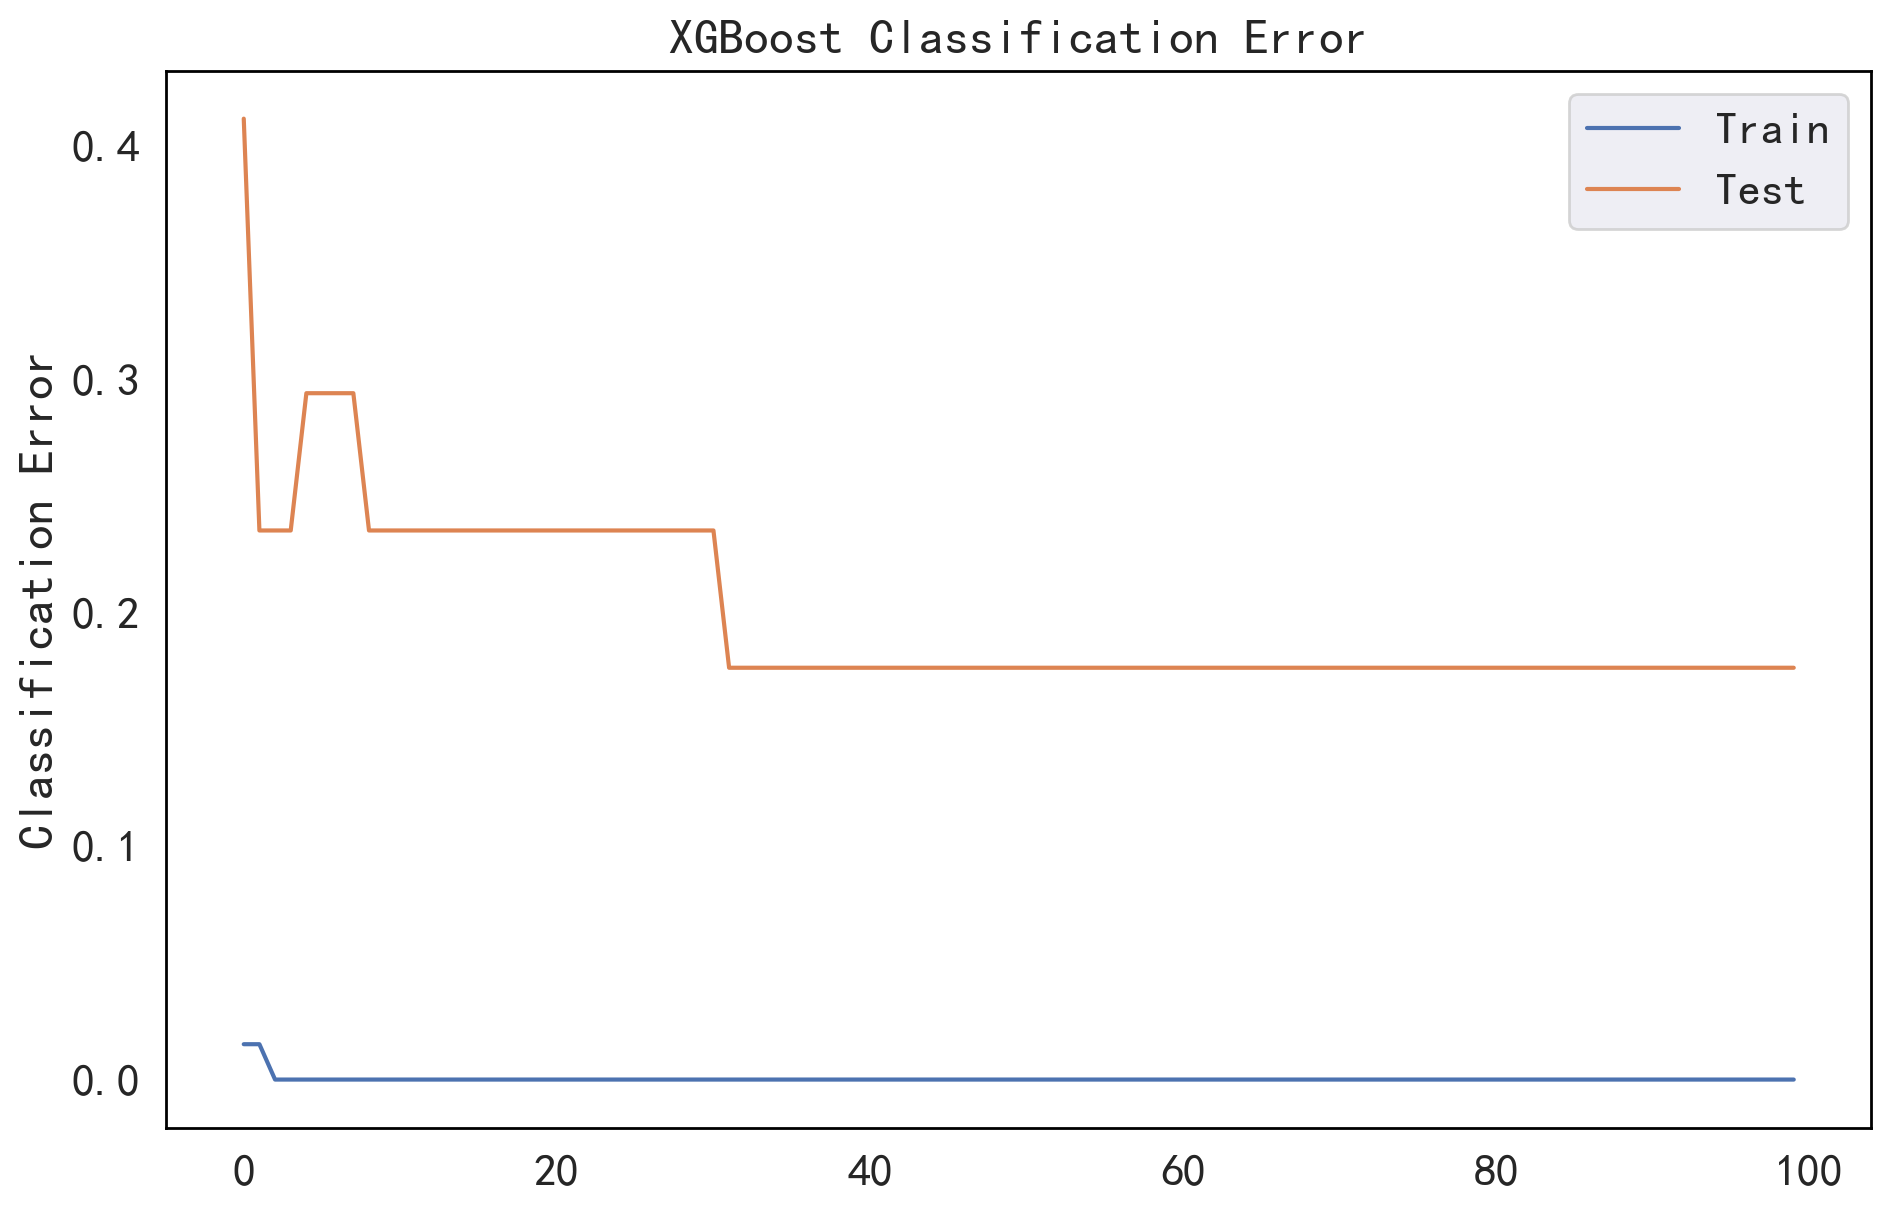

In [127]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = data
# split data into X and y
X= dataset.drop(["Symbol","subtype"],axis=1)
Y = dataset["subtype"]
# split data into train and test sets
#X = SXtrain
#Y = SYtrain
X = data[['NCOA5','LIMCH1','MRPS28','WDR3','EXOC7','PNO1','ZC3H4','MAPRE3']]
Y = data["subtype"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                Y,
                                               test_size=0.2,
                                                random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()#max_depth=13,reg_lambda=0.1,objective="binary:logistic",min_child_weight=0.0001
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig=plt.figure(figsize=(11,7),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')

ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
#pyplot.show()
pyplot.savefig(r'D:/data/联川/xuexi3-1-2.jpg')


# plot classification error
fig=plt.figure(figsize=(11,7),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')

ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
#pyplot.show()
pyplot.savefig(r'D:/data/联川/xuexi3-1.jpg')

C:\Users\C\AppData\Local\Temp\ipykernel_13908\3491652826.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


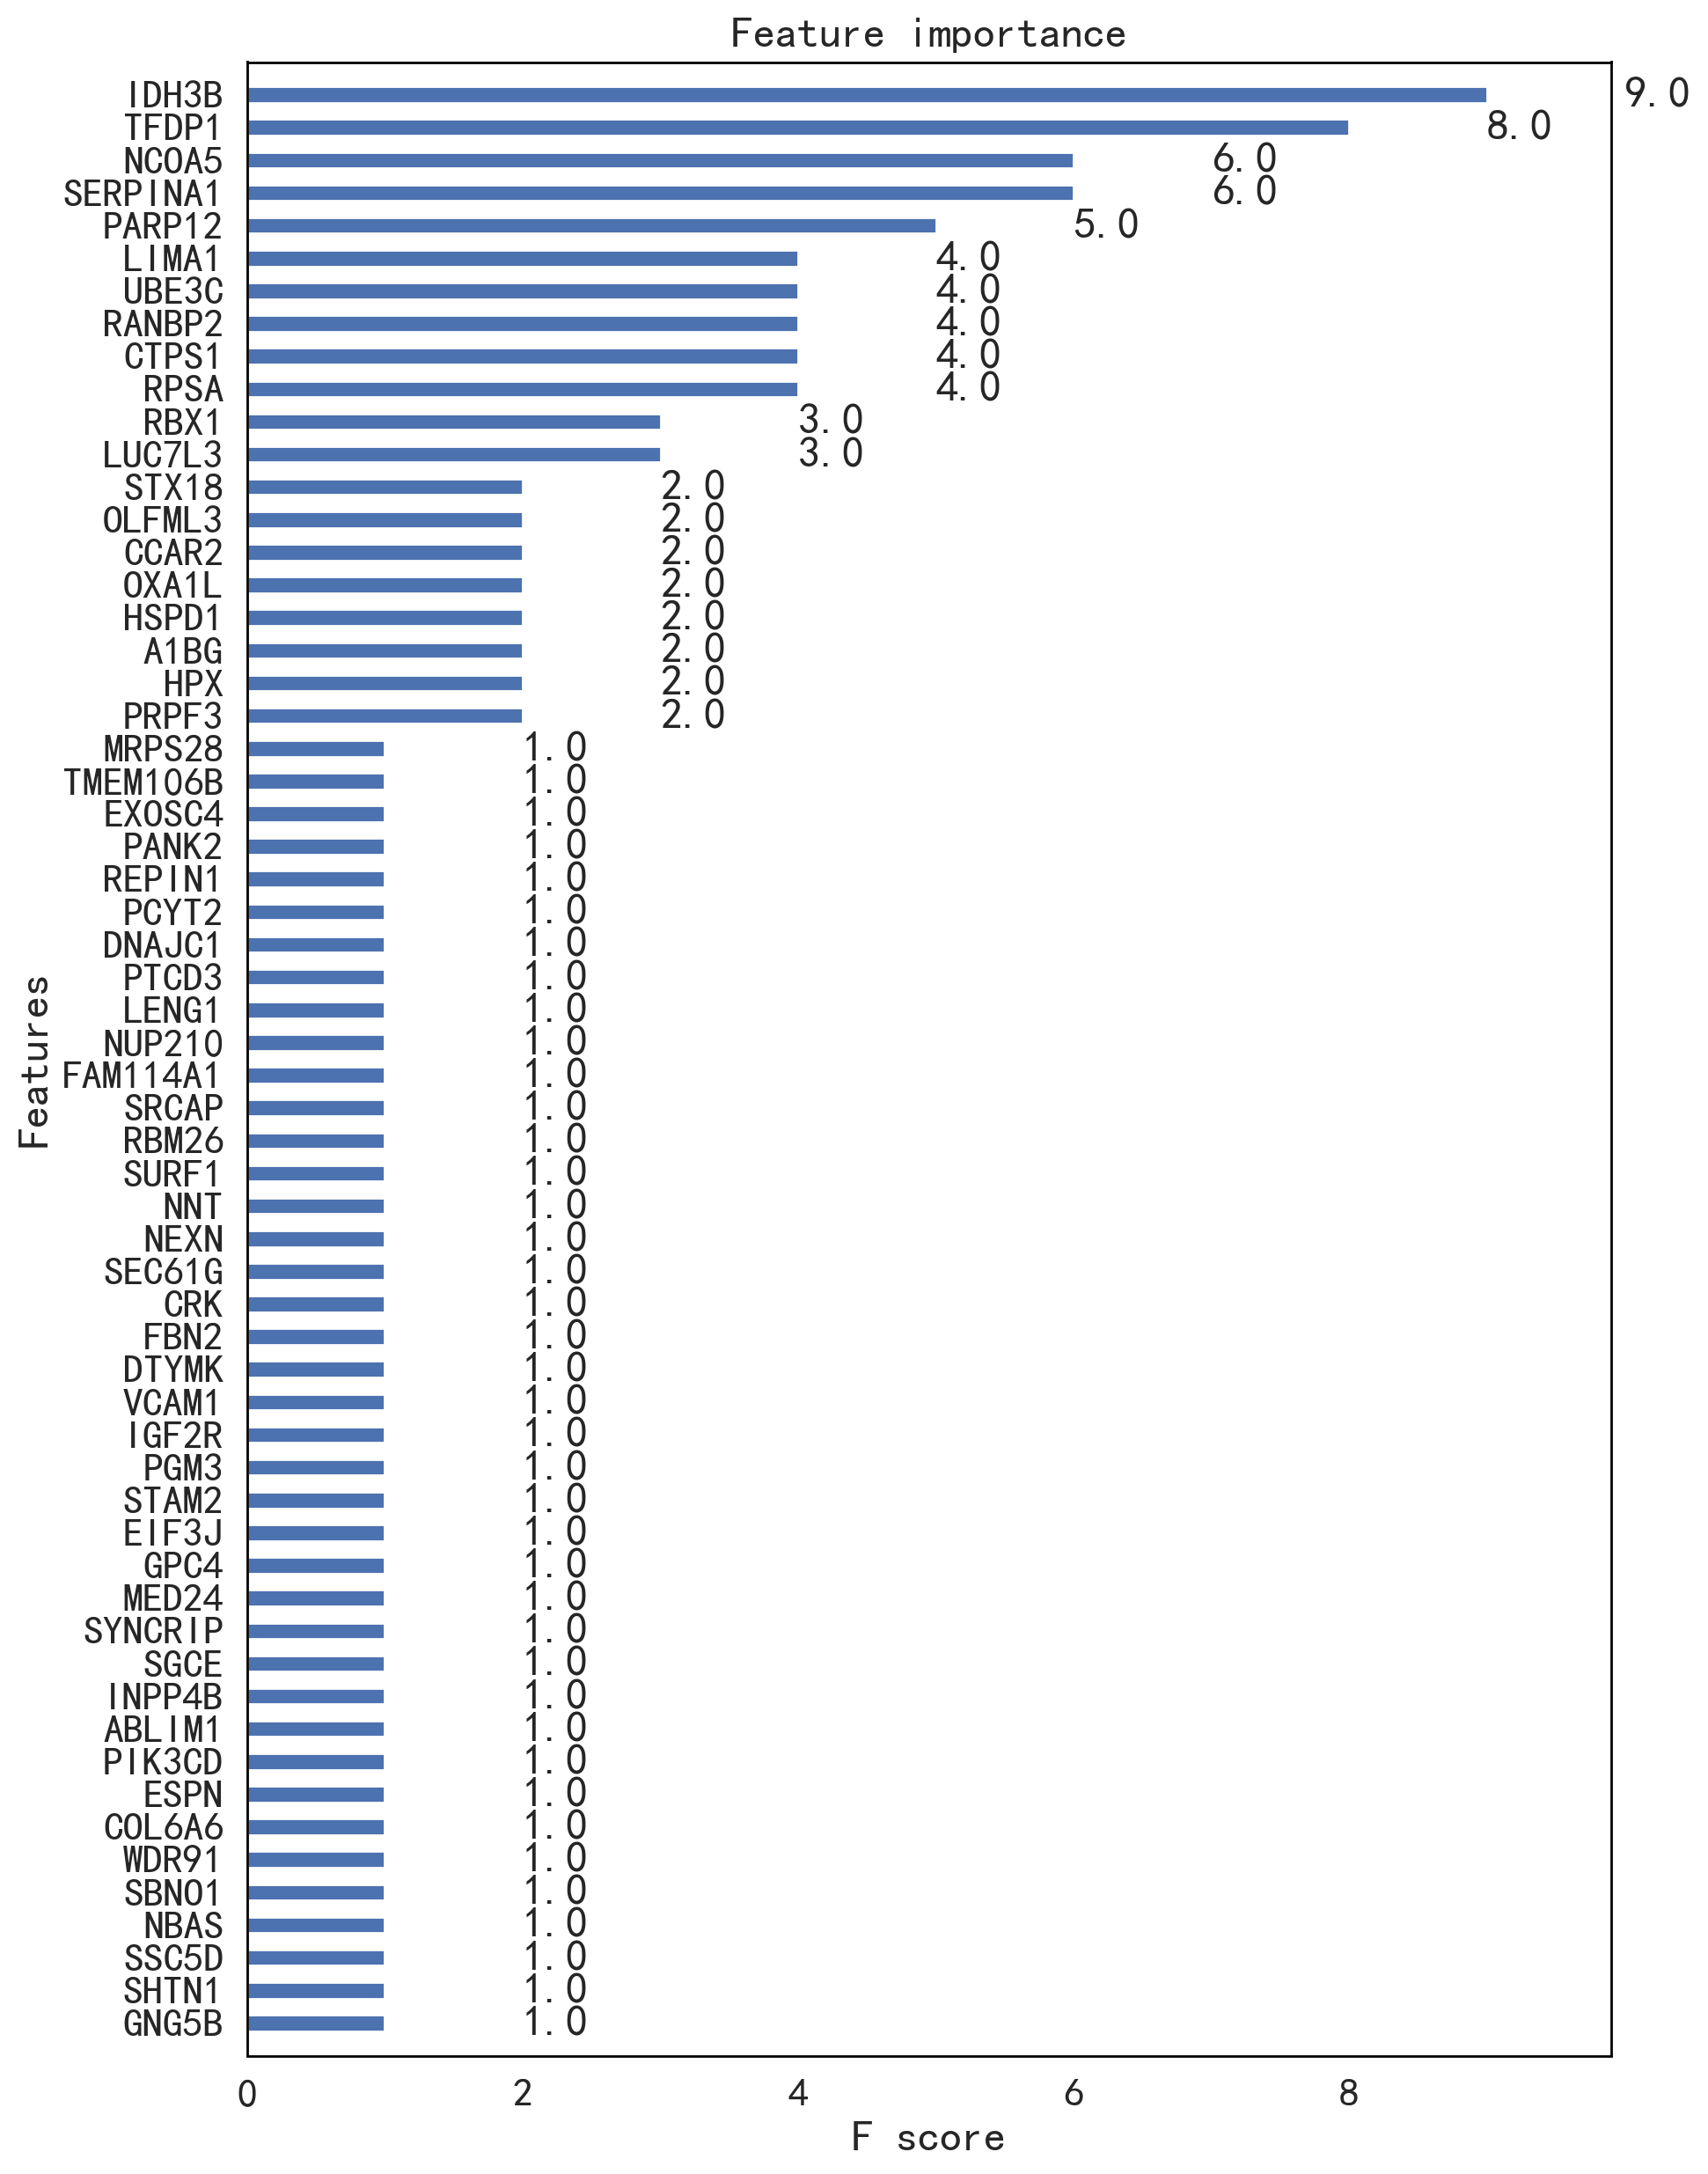

In [39]:
import xgboost as xgb
from xgboost import plot_importance
plt.figure(figsize=(10,15),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


plot_importance(XGB,max_num_features=60,ax=ax,height=0.5);
plt.savefig(r'D:/data/3-1-1.jpg')

# SVM

In [13]:
from sklearn import svm
from sklearn.svm import SVC
# 创建SVM分类器
SVM = svm.SVC(kernel='linear',probability=True)#kernel='linear',probability=True
# 训练分类器
SVM.fit(Xtrain,Ytrain)

#评估
from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain,SVM.predict(Xtrain))
print('train_score',train_score)
test_score = accuracy_score(Ytest, SVM.predict(Xtest))
print('test_score',test_score)

test_predict3 = SVM.predict(Xtest)
#print(test_predict)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, roc_auc_score


Ypred=SVM.predict_proba(Xtest)
score = SVM.predict_proba(Xtest)[:, 1]
predict = SVM.predict(Xtest)

#print("AUC:", roc_auc_score(Ytest, score))
print("AUC:", roc_auc_score(Ytest, Ypred,multi_class='ovo'))
print('Cross-entropy loss:', metrics.log_loss(Ytest, Ypred))

#交叉验证
scores = cross_val_score(SVM, Xtrain, Ytrain,cv=10)
scores.mean()

train_score 0.696969696969697
test_score 0.5882352941176471
AUC: 0.7925925925925927
Cross-entropy loss: 1.066727779331601


0.6166666666666666

In [8]:
svm_weights_1 = (SVM.coef_ ** 2).ravel()
svm_weights_2 = svm_weights_1 / svm_weights_1.sum()
SVM.score(Xtest,Ytest),sorted([*zip(Xtrain.columns,svm_weights_2)],key=lambda s:abs(s[1]),reverse=True)
#print(svm_weights_2)

(0.8823529411764706,
 [('NUDT1', 0.0012252981922982417),
  ('POLR3C', 0.0011494519982071967),
  ('RAB34', 0.0011248836960088282),
  ('INPP4B', 0.0011070353544897964),
  ('TAB1', 0.0010826790139293824),
  ('NISCH', 0.0008685066209778859),
  ('DNAJC1', 0.0008682182689147774),
  ('ABCA8', 0.0008184113959994741),
  ('CPM', 0.0008124947611120947),
  ('HIF1AN', 0.0008064211388132841),
  ('FNDC3A', 0.0008006576640161072),
  ('HIP1R', 0.0007858729029857822),
  ('TUBA1C', 0.0007482099119639095),
  ('RALBP1', 0.0007371278106116119),
  ('GMFB', 0.0006975800271354885),
  ('SHBG', 0.0006946731911918039),
  ('ZDHHC5', 0.0006761682210997935),
  ('RABL6', 0.000664723881179603),
  ('PRKACA', 0.0006500176006810854),
  ('ANKS1A', 0.0006348472616887242),
  ('SRCAP', 0.00062437679540604),
  ('VEZF1', 0.0006234836775756463),
  ('CLIC2', 0.0006213103807633493),
  ('RPP38', 0.0006123686756816152),
  ('TEP1', 0.0006062341241262234),
  ('SPART', 0.0006040460984534444),
  ('IGHG3', 0.000602407536757971),
  ('AKR

# 递归+随机森林

In [ ]:
'LIMCH1','MAPRE3','RUVBL2','MRPS28','WDR3','EXOC7','CORO2B','CLEC11A','FARSA','LEMD3','MACF1','TBC1D2B',
                'NIP7','TRAPPC4','PNO1','SCAF8','SMC3','GNE','BCS1L','NCKAP1','PPP6R1',
                'RTRAF','NCOA5','FZD1','USP22','SRRM2','NSFL1C','ZC3H4','SHOC2','TNN','HIGD1A','NDRG2','COG5','USP24','PA2G4'

In [105]:
# 进行特征筛选
selectX = data[['LIMCH1','MAPRE3','RUVBL2','WDR3','EXOC7','CORO2B','CLEC11A','FARSA','LEMD3','MACF1','TBC1D2B',
               'TRAPPC4','PNO1','SCAF8','SMC3','GNE','BCS1L','NCKAP1',
                'RTRAF','FZD1','USP22','SRRM2','NSFL1C','SHOC2','TNN','HIGD1A','NDRG2','COG5','USP24','PA2G4'
]]
selectY = data["subtype"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(selectX,
                                                selectY,
                                               test_size=0.2,
                                                random_state=42)

In [106]:
SXtrain=Xtrain
SYtrain=Ytrain
SXtest=Xtest
SYtest=Ytest

In [13]:
#评估器为随机森林的递归特征选择法即包装法
from sklearn.ensemble import RandomForestClassifier as RFC_  #分类器
from sklearn.feature_selection import RFE  #递归特征消除法

rf=RFC_(random_state=42)
rf=rf.fit(SXtrain,SYtrain)

selector_RFE = RFE(rf,
                   n_features_to_select=20,
                   step=1
                  ).fit(SXtrain, SYtrain)


#over_x.columns[selector_RFE.get_support()]
SXtrain.columns[selector_RFE.get_support()]
#print("Optimal number of features : %d" % rfecv.n_features_)
#sorted([*zip(over_x.columns,selector_RFE.get_support().ravel())])
#sorted([*zip(over_x.columns,rf.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

Index(['ASPN', 'WDR12', 'MFF', 'NAT10', 'ILKAP', 'PARP12', 'CARD9', 'XPO5',
       'CACYBP', 'MOV10', 'SDF2L1', 'TUFT1', 'SSU72', 'OLFML3', 'CPSF3',
       'NUP50', 'PPP6R1', 'NIP7', 'MRPS28', 'PRRC2C'],
      dtype='object')

In [29]:
a=over_x.columns[selector_RFE.get_support()]
print(a[:99])
print(a[99:198])
print(a[198:200])

Index(['ILKAP', 'XRN2', 'TOLLIP', 'BRD8', 'PARP12', 'CSTF2T', 'WWP1', 'CYRIA',
       'TMEM222', 'HDHD2', 'GBP3', 'DDX47', 'RAB1B', 'LMAN2L', 'CCDC8',
       'C11orf54', 'FAM234A', 'SIL1', 'GLT8D2', 'UNC93B1', 'TMX4', 'KIF13A',
       'ASCC2', 'ISCU', 'SLC35B3', 'OSBPL2', 'ATG5', 'WDR13', 'EHD4', 'CARD9',
       'VPS16', 'VPS11', 'SH3BGRL3', 'GAN', 'TRIOBP', 'HSD3B7', 'SLK', 'PPIL3',
       'PDCL3', 'RAB3GAP2', 'ADNP', 'DPH5', 'DHX36', 'PPA2', 'SPNS1', 'PNN',
       'TMEM245', 'FOXP1', 'CPVL', 'C11orf68', 'DPAGT1', 'GHITM', 'BOLA2B',
       'TMX1', 'NELFA', 'CDC42EP4', 'NDST4', 'PTPN23', 'SMOC2', 'DNAJC5',
       'DSN1', 'RBKS', 'POFUT1', 'TOR3A', 'WNK1', 'RNPEP', 'GOLPH3L', 'GOLPH3',
       'EPB41L1', 'SERHL2', 'EHD1', 'ALG2', 'HEATR1', 'POMK', 'DENND2D',
       'CCDC86', 'PRR36', 'CIAO3', 'ACSS3', 'NOL6', 'BCAS3', 'LDAH', 'RIOX1',
       'WDR55', 'RANBP3', 'RPF2', 'AAMDC', 'WDR26', 'C8orf33', 'SUDS3', 'KAT8',
       'PTGES2', 'PHAX', 'UBE2Z', 'ACAD9', 'DDX31', 'MOB1A', 'GORASP2',
   

In [ ]:
X_wrapper = selector_RFE.transform(SXtrain)
cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()

score=[]
for i in range(1,300,1):
    X_wrapper = RFE(rf,n_features_to_select=i,step=1).fit_transform(SXtrain,SYtrain)
    once = cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,300,1),score)
plt.xticks(range(1,300,20));

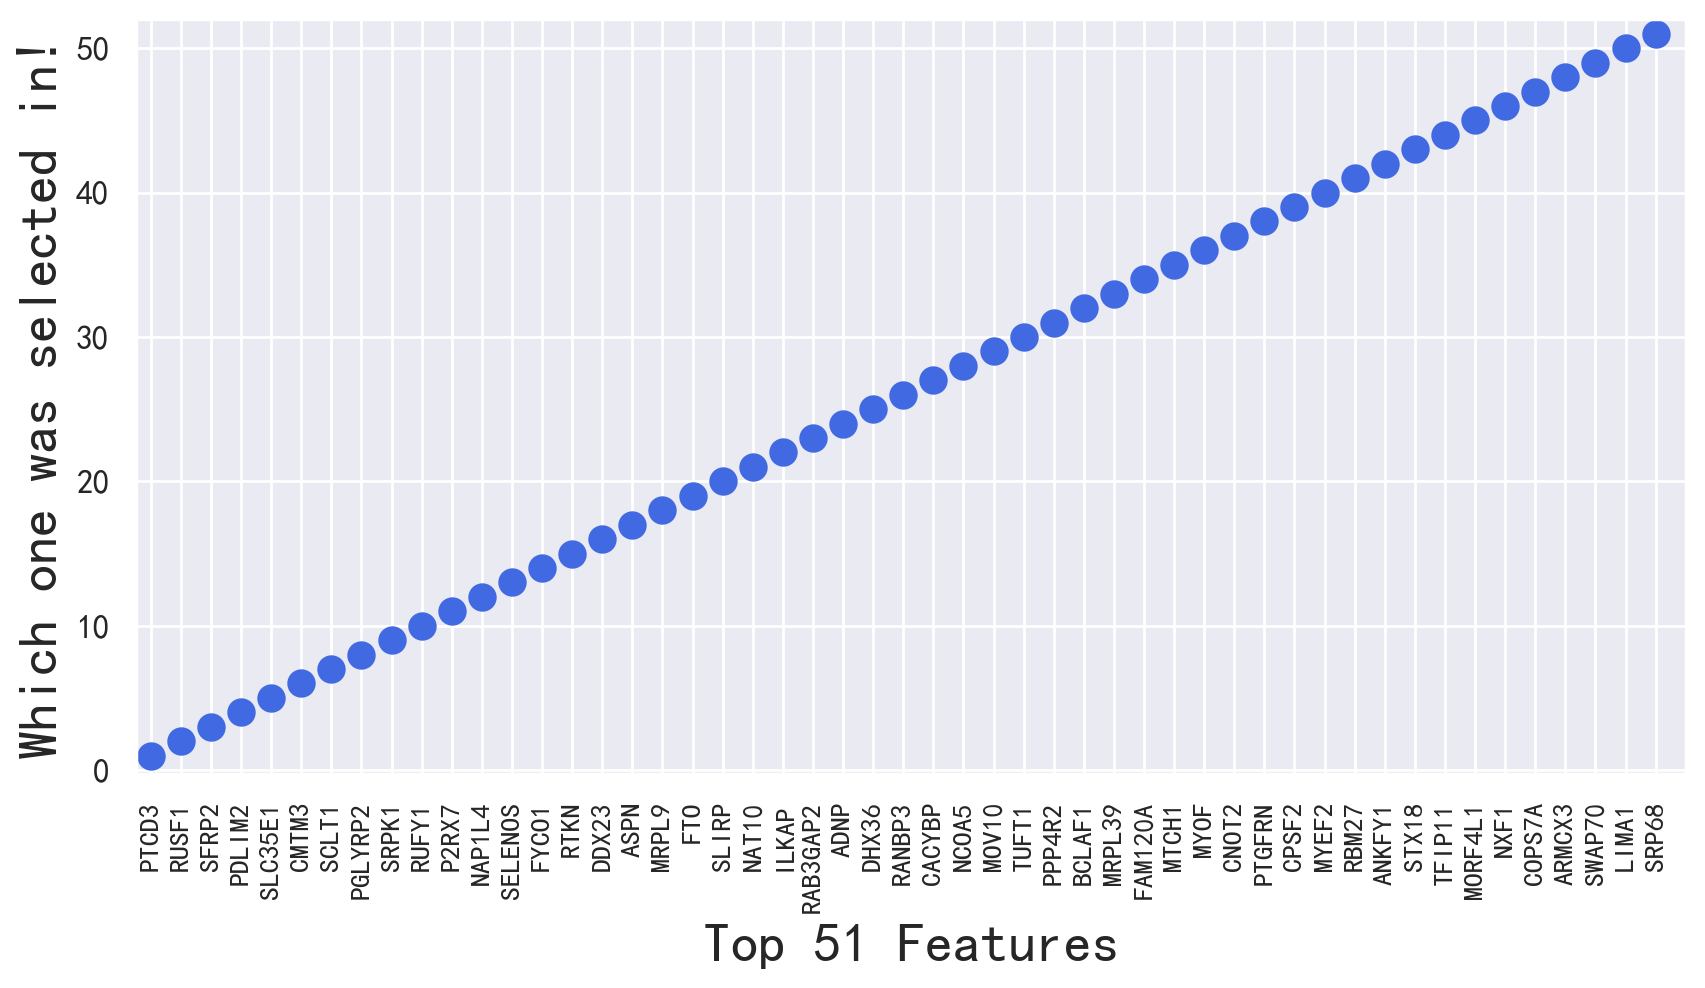

In [46]:
X=[ 'PTCD3', 'RUSF1', 'SFRP2', 'PDLIM2', 'SLC35E1', 'CMTM3', 'SCLT1',
       'PGLYRP2', 'SRPK1', 'RUFY1', 'P2RX7', 'NAP1L4', 'SELENOS', 'FYCO1',
       'RTKN', 'DDX23', 'ASPN', 'MRPL9', 'FTO', 'SLIRP', 'NAT10', 'ILKAP',
       'RAB3GAP2', 'ADNP', 'DHX36', 'RANBP3', 'CACYBP', 'NCOA5', 'MOV10',
       'TUFT1', 'PPP4R2', 'BCLAF1', 'MRPL39', 'FAM120A', 'MTCH1', 'MYOF',
       'CNOT2', 'PTGFRN', 'CPSF2', 'MYEF2', 'RBM27', 'ANKFY1', 'STX18',
       'TFIP11', 'MORF4L1', 'NXF1', 'COPS7A', 'ARMCX3', 'SWAP70', 'LIMA1',
       'SRP68']
#Y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
Y=range(1,52,1)
plt.figure(figsize=(10,5)     # 图像的尺寸（长，宽）
          ,dpi=200             # 图像分辨率
          ,facecolor='w'      # 图像的背景颜色，设置为白色，默认也是白色
          ,edgecolor='k'      # 图像的边框颜色，设置为黑色，默认也是黑色
          )

plt.scatter(X,Y,s=85,c='royalblue')
plt.rcParams['font.sans-serif'] = ['Arial']   # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题
plt.gca().set(xlim=(-0.5,51),ylim=(-0.3,52))       # plt.gca()表示如果有现在的图存在,获取现在的图，set（横坐标取0-30，纵坐标取0-3.3）控制横纵坐标的范围
plt.xticks(rotation=90,fontsize=10)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=12)
plt.ylabel("Which one was selected in!",fontsize=20)                 # 坐标轴上的标题和字体大小
plt.xlabel("Top 51 Features",fontsize=20)
#plt.title("",fontsize=20)      # 整个图像的标题和字体的大小
#plt.show()
plt.savefig(r'D:/data/联川/散点3-1.jpg')

C:\Users\C\AppData\Local\Temp\ipykernel_10852\2285517604.py:124: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


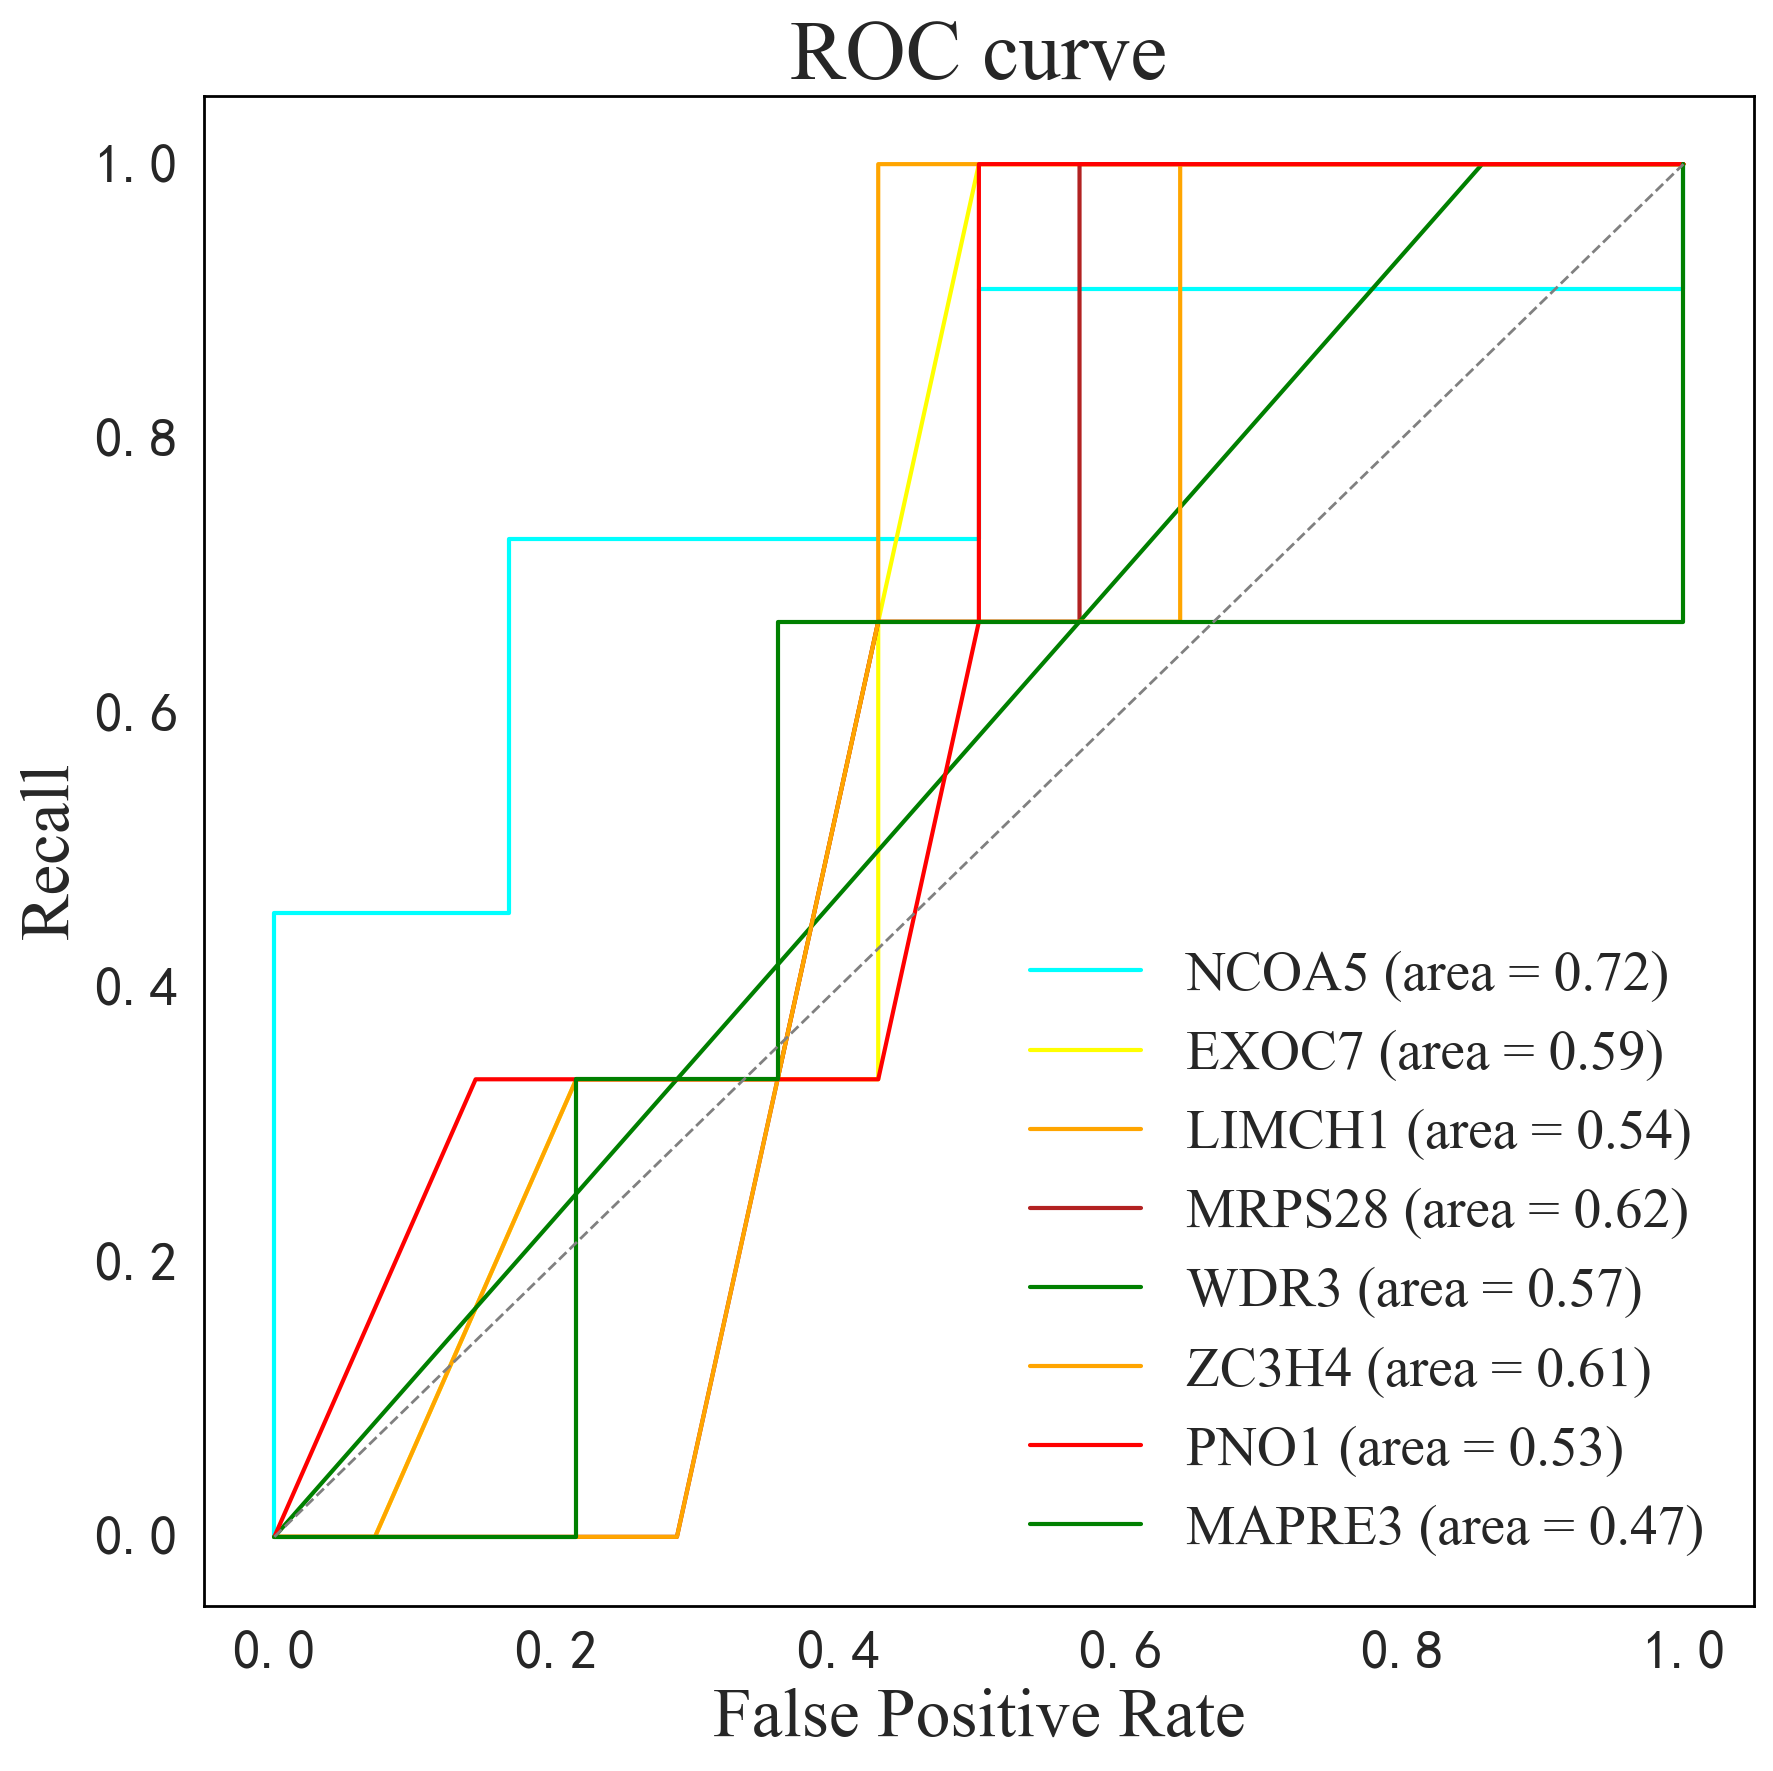

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import miceforest as mf  #填补缺失值
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier as XGBC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False
data = pd.read_excel(r'D:/data/联川/work3.xlsx')



# 进行特征筛选
selectX1 = data[['NCOA5']]
selectX2 = data["EXOC7"]
selectX3 = data["LIMCH1"]
selectX4 = data["MRPS28"]
selectX5 = data["WDR3"]
selectX6 = data["ZC3H4"]
selectX7 = data["PNO1"]
selectX8 = data["MAPRE3"]
selectY1 = data["subtype"]
selectY2 = data["subtype"]
selectY3 = data["subtype"]
selectY4 = data["subtype"]
selectY5 = data["subtype"]
selectY6 = data["subtype"]
selectY7 = data["subtype"]
selectY8 = data["subtype"]

Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(selectX1,
                                                selectY1,
                                               test_size=0.2,
                                                random_state=50)
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(selectX2,
                                                selectY2,
                                               test_size=0.2,
                                                random_state=42)
Xtrain3, Xtest3, Ytrain3, Ytest3 = train_test_split(selectX3,
                                                selectY3,
                                               test_size=0.2,
                                                random_state=42)
Xtrain4, Xtest4, Ytrain4, Ytest4 = train_test_split(selectX4,
                                                selectY4,
                                               test_size=0.2,
                                                random_state=42)
Xtrain5, Xtest5, Ytrain5, Ytest5 = train_test_split(selectX5,
                                                selectY5,
                                               test_size=0.2,
                                                random_state=42)
Xtrain6, Xtest6, Ytrain6, Ytest6 = train_test_split(selectX6,
                                                selectY6,
                                               test_size=0.2,
                                                random_state=42)
Xtrain7, Xtest7, Ytrain7, Ytest7 = train_test_split(selectX7,
                                                selectY7,
                                               test_size=0.2,
                                                random_state=42)
Xtrain8, Xtest8, Ytrain8, Ytest8 = train_test_split(selectX8,
                                                selectY8,
                                               test_size=0.2,
                                                random_state=42)




XGB = XGBClassifier()#max_depth=13,reg_lambda=0.1,objective="binary:logistic",min_child_weight=0.0001
XGB1=XGB.fit(Xtrain1,Ytrain1) 
XGB2=XGB.fit(Xtrain2,Ytrain2)
XGB3=XGB.fit(Xtrain3,Ytrain3)
XGB4=XGB.fit(Xtrain4,Ytrain4)
XGB5=XGB.fit(Xtrain5,Ytrain5)
XGB6=XGB.fit(Xtrain6,Ytrain6)
XGB7=XGB.fit(Xtrain7,Ytrain7)
XGB8=XGB.fit(Xtrain8,Ytrain8)

#score1=XGB1.predict_proba(Xtest1)[:,1]
#score2=XGB2.predict_proba(Xtest2)[:,1]
#score3=XGB3.predict_proba(Xtest3)[:,1]
#score4=XGB4.predict_proba(Xtest4)[:,1]
#score5=XGB5.predict_proba(Xtest5)[:,1]



#fpr,tpr,thres = roc_curve(Ytest1,score1)


FPR1,recall1,thresholds1=roc_curve(Ytest1,XGB.predict_proba(Xtest1)[:,1],pos_label=1)
FPR2,recall2,thresholds2=roc_curve(Ytest2,XGB.predict_proba(Xtest2)[:,1],pos_label=1)
FPR3,recall3,thresholds3=roc_curve(Ytest3,XGB.predict_proba(Xtest3)[:,1],pos_label=1)
FPR4,recall4,thresholds4=roc_curve(Ytest4,XGB.predict_proba(Xtest4)[:,1],pos_label=1)
FPR5,recall5,thresholds5=roc_curve(Ytest5,XGB.predict_proba(Xtest5)[:,1],pos_label=1)
FPR6,recall6,thresholds6=roc_curve(Ytest6,XGB.predict_proba(Xtest6)[:,1],pos_label=1)
FPR7,recall7,thresholds7=roc_curve(Ytest7,XGB.predict_proba(Xtest7)[:,1],pos_label=1)
FPR8,recall8,thresholds8=roc_curve(Ytest8,XGB.predict_proba(Xtest8)[:,1],pos_label=1)

area1=auc(Ytest1,XGB1.predict_proba(Xtest1),multi_class='ovo')
area2=auc(Ytest2,XGB2.predict_proba(Xtest2),multi_class='ovo')
area3=auc(Ytest3,XGB3.predict_proba(Xtest3),multi_class='ovo')
area4=auc(Ytest4,XGB4.predict_proba(Xtest4),multi_class='ovo')
area5=auc(Ytest5,XGB5.predict_proba(Xtest5),multi_class='ovo')
area6=auc(Ytest6,XGB6.predict_proba(Xtest6),multi_class='ovo')
area7=auc(Ytest7,XGB7.predict_proba(Xtest7),multi_class='ovo')
area8=auc(Ytest8,XGB8.predict_proba(Xtest8),multi_class='ovo')


fig=plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')




plt.plot(FPR1, recall1, color='cyan',
         label='NCOA5 (area = %0.2f)'% area1 ,linewidth=1.5)
plt.plot(FPR2, recall2, color='yellow',
         label='EXOC7 (area = %0.2f)'% area2 ,linewidth=1.5)
plt.plot(FPR3, recall3, color='orange',
         label='LIMCH1 (area = %0.2f)'% area3 ,linewidth=1.5)
plt.plot(FPR4, recall4, color='firebrick',
         label='MRPS28 (area = %0.2f)'% area4  ,linewidth=1.5)
plt.plot(FPR5, recall5, color='green',
         label='WDR3 (area = %0.2f)'% area5  ,linewidth=1.5)
plt.plot(FPR6, recall6, color='orange',
         label='ZC3H4 (area = %0.2f)'% area6 ,linewidth=1.5)
plt.plot(FPR7, recall7, color='red',
         label='PNO1 (area = %0.2f)'% area7  ,linewidth=1.5)
plt.plot(FPR8, recall8, color='green',
         label='MAPRE3 (area = %0.2f)'% area8  ,linewidth=1.5)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--' ,linewidth=1.0)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':25
     }
font1={'family':'Times New Roman', 
      'weight':'normal',
      'size':20
     }
plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=20)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('Recall',fontdict=font)
plt.title('ROC curve',fontdict={'family':'Times New Roman',  'weight':'normal', 'size':30})
plt.legend(loc="lower right",prop = font1,facecolor='w',edgecolor='w');
#plt.grid(True,color='black',linestyle='--',alpha=0.1);
#plt.savefig(r'D:/data/联川/ROC1-4-1.jpg')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
 

#创建逻辑回归模型
model = LogisticRegression()
 
# 创建特征递归消除法对象，选择最优的20个特征
rfe = RFE(model, n_features_to_select=125)
 
# 使用特征递归消除法来训练模型并选择最优的20个特征
X_selected = rfe.fit(SXtrain, SYtrain)

print(over_x.columns[X_selected.get_support()])

#print("Optimal number of features : %d" % rfecv.n_features_)
sorted([*zip(over_x.columns,X_selected.get_support().ravel())])
#sorted([*zip(over_x.columns,model.coef_.ravel())],key=lambda s:abs(s[1]),reverse=True)

 
# 打印最优的20个特征的索引和名称
#print(rfe.get_support(indices=True))
 
# 打印特征选择后的数据集
#print(X_selected)

C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Index(['TNFRSF14', 'ITGB2', 'IL-17RA', 'TNF-R2', 'MMP-9', 'EPHB4', 'IL2-RA',
       'OPG', 'ALCAM', 'SELP',
       ...
       'AOC3', 'VASN', 'LILRB2', 'LILRB1', 'TIMD4', 'OSMR', 'C1QTNF1',
       'CRTAC1', 'FETUB', 'GP6'],
      dtype='object', length=125)


C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[('ALCAM', True),
 ('ANG', False),
 ('ANGPTL3', False),
 ('AOC3', True),
 ('AP-N', True),
 ('APOM', True),
 ('AXL', True),
 ('AZU1', True),
 ('BLM hydrolase', False),
 ('C1QTNF1', True),
 ('C2', True),
 ('CA1', True),
 ('CA3', True),
 ('CA4', True),
 ('CASP-3', True),
 ('CCL14', False),
 ('CCL15', True),
 ('CCL16', False),
 ('CCL18', True),
 ('CCL24', False),
 ('CCL5', False),
 ('CD163', False),
 ('CD46', True),
 ('CD59', True),
 ('CD93', True),
 ('CDH1', True),
 ('CDH5', True),
 ('CES1', False),
 ('CFHR5', False),
 ('CHI3L1', False),
 ('CHIT1', False),
 ('CHL1', True),
 ('CNDP1', False),
 ('CNTN1', True),
 ('COL18A1', False),
 ('COL1A1', True),
 ('COMP', True),
 ('CPA1', True),
 ('CPB1', True),
 ('CR2', True),
 ('CRTAC1', True),
 ('CST3', False),
 ('CSTB', True),
 ('CTSD', True),
 ('CTSZ', False),
 ('CXCL16', True),
 ('DEFA1', True),
 ('DLK-1', True),
 ('DPP4', False),
 ('EFEMP1', True),
 ('EGFR', True),
 ('ENG', True),
 ('EPHB4', True),
 ('Ep-CAM', False),
 ('F11', True),
 ('F7', Fal

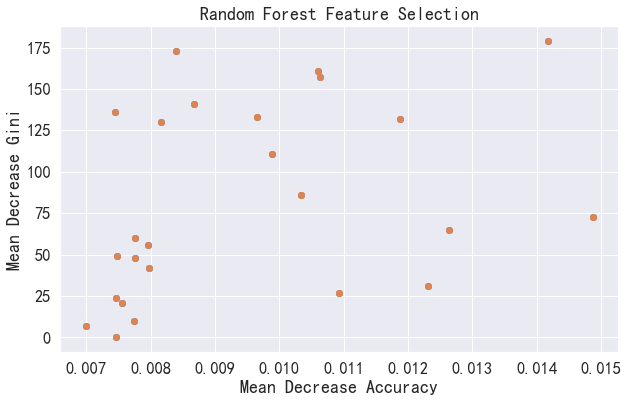

In [43]:
# 获取特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 取前25个特征
top_25_features = indices[:25]

top_25_importances = importances[top_25_features]

# 计算mean decrease accuracy和mean decrease gini
mean_decrease_accuracy = rf.feature_importances_[top_25_features]
mean_decrease_gini = rf.feature_importances_[top_25_features]

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(mean_decrease_accuracy,top_25_features)
plt.scatter(mean_decrease_gini,top_25_features)
plt.xlabel('Mean Decrease Accuracy')
plt.ylabel('Mean Decrease Gini')
plt.title('Random Forest Feature Selection')
plt.show()

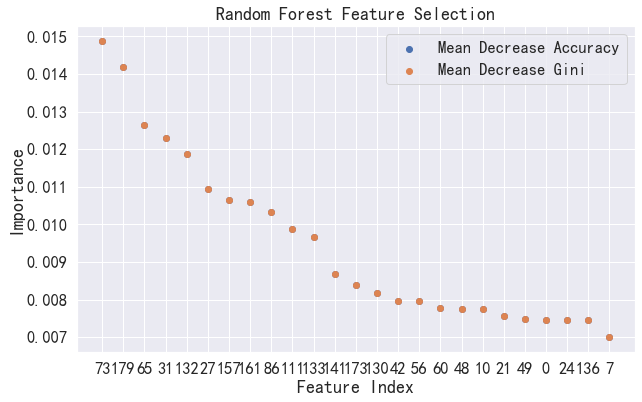

In [45]:




# 获取特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 取前25个特征
top_25_features = indices[:25]
top_25_importances = importances[top_25_features]

# 计算mean decrease accuracy和mean decrease gini
mean_decrease_accuracy = rf.feature_importances_[top_25_features]
mean_decrease_gini = rf.feature_importances_[top_25_features]

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_25_features)), mean_decrease_accuracy, label='Mean Decrease Accuracy')
plt.scatter(range(len(top_25_features)), mean_decrease_gini, label='Mean Decrease Gini')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Random Forest Feature Selection')
plt.xticks(range(len(top_25_features)), top_25_features)
plt.legend()
plt.show()

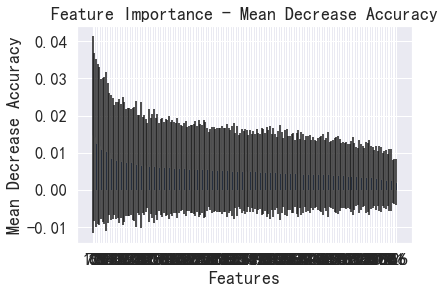

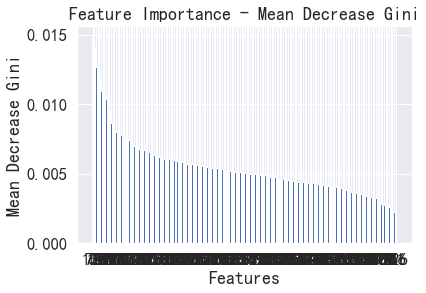

In [27]:
# 读取数据
X = SXtrain
y = SYtrain
rf=rf.fit(X,y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# 排序得到特征重要性排名
indices = np.argsort(importances)[::-1]

# 绘制 mean decrease accuracy 图
plt.figure()
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]),indices)
plt.xlabel('Features')
plt.ylabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()

# 计算 mean decrease gini
feature_importance_gini = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# 排序得到 mean decrease gini 排名
indices_gini = np.argsort(feature_importance_gini)[::-1]

# 绘制 mean decrease gini 图
plt.figure()
plt.bar(range(X.shape[1]), feature_importance_gini[indices_gini], align='center')
plt.xticks(range(X.shape[1]), indices_gini)
plt.xlabel('Features')
plt.ylabel('Mean Decrease Gini')
plt.title('Feature Importance - Mean Decrease Gini')
plt.show()

In [30]:
rf.score(X,y),sorted([*zip(X.columns,rf.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

(1.0,
 [('SCGB3A2', 0.01487824237470033),
  ('CRTAC1', 0.014173826959229443),
  ('SHPS-1', 0.012633244521360103),
  ('TR', 0.01230624266580886),
  ('VCAM1', 0.01187494276474338),
  ('FABP4', 0.010931782279011674),
  ('FAP', 0.010638615270891794),
  ('GAS6', 0.010597204271368451),
  ('TNF-R1', 0.010336941910827109),
  ('PRSS2', 0.00988606074743213),
  ('CR2', 0.009660706727442772),
  ('DPP4', 0.008678259425818523),
  ('TIMD4', 0.008398744332832874),
  ('IGFBP3', 0.008164552768226196),
  ('IGFBP-1', 0.007971931714241876),
  ('PCSK9', 0.007955770471460894),
  ('PGLYRP1', 0.007763959431651849),
  ('AP-N', 0.007752006900650391),
  ('OPG', 0.007745518889711971),
  ('LTBR', 0.007561181807546811),
  ('AXL', 0.007484701294826505),
  ('NT-proBNP', 0.007461665097813813),
  ('CNTN1', 0.007454973378503801),
  ('CA4', 0.007447345436859365),
  ('MMP-9', 0.006993363693121624),
  ('U-PAR', 0.006974998586193895),
  ('GDF-15', 0.0069729311857640525),
  ('TR-AP', 0.006963800874728843),
  ('TFPI', 0.006749

In [31]:
rf.feature_importances_.ravel()

array([0.00746167, 0.00435045, 0.00358066, 0.00362604, 0.00394364,
       0.00463512, 0.00337903, 0.00699336, 0.00674653, 0.00450037,
       0.00774552, 0.00406633, 0.00366534, 0.00343598, 0.00431016,
       0.00513989, 0.00424086, 0.00481133, 0.0052302 , 0.0043331 ,
       0.00401997, 0.00756118, 0.00545174, 0.00509399, 0.00745497,
       0.00261476, 0.00399103, 0.01093178, 0.00674959, 0.00571919,
       0.00506579, 0.01230624, 0.00382785, 0.00697293, 0.00503191,
       0.00335724, 0.0059751 , 0.00670939, 0.00488016, 0.00438586,
       0.00323782, 0.00651879, 0.00797193, 0.0042548 , 0.0069638 ,
       0.00550828, 0.00429278, 0.00407812, 0.00775201, 0.0074847 ,
       0.00518015, 0.00521426, 0.00658419, 0.00500521, 0.00439845,
       0.00510506, 0.00795577, 0.006975  , 0.00610422, 0.00546747,
       0.00776396, 0.00531848, 0.00569097, 0.00604344, 0.00603325,
       0.01263324, 0.00549718, 0.00593331, 0.00614405, 0.00365263,
       0.00552753, 0.00497661, 0.00642225, 0.01487824, 0.00272

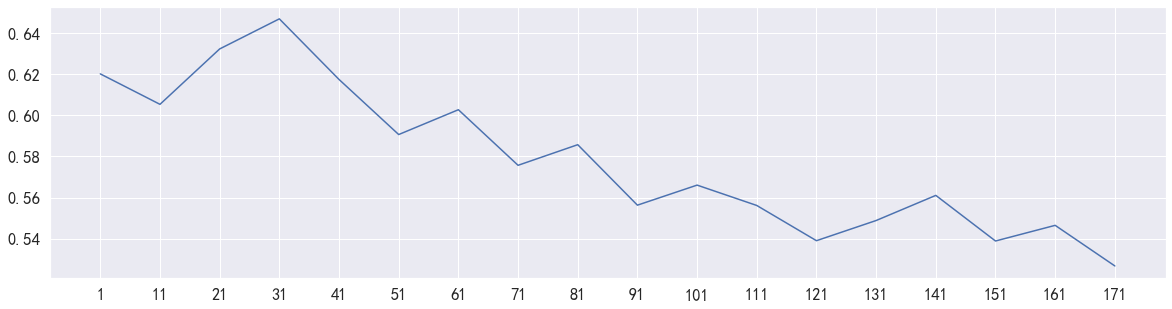

In [18]:
X_wrapper = selector_RFE.transform(SXtrain)
cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()

score=[]
for i in range(1,181,10):
    X_wrapper = RFE(rf,n_features_to_select=i,step=1).fit_transform(SXtrain,SYtrain)
    once = cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,181,10),score)
plt.xticks(range(1,181,10));

In [4]:
# 逻辑回归L2正则化
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(SXtrain, SYtrain)
print("Training set score: {:.2f}".format(lr.score(SXtrain, SYtrain)))
print("Test set score: {:.2f}".format(lr.score(SXtest, SYtest)))
sorted([*zip(SXtrain.columns, lr.coef_.ravel())],key=lambda s: abs(s[1]),reverse=True)

Training set score: 0.83
Test set score: 0.56


C:\Users\C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[('F11', -1.558608353435052),
 ('ST6GAL1', 1.3419155717098348),
 ('UMOD', -1.2264332005919063),
 ('CNTN1', 1.173999437833672),
 ('TNF-R1', -1.143591415004977),
 ('SOD1', -1.0147913785393639),
 ('FAP', 0.9764272403648011),
 ('RARRES2', 0.8883274217063946),
 ('EFEMP1', -0.8821471437460348),
 ('LILRB2', -0.8328154043874292),
 ('TIMD4', -0.8257445864549313),
 ('CD93', 0.8216732444165963),
 ('LTBR', -0.796080998403601),
 ('SERPINA5', 0.7906471121804144),
 ('GP6', 0.7853664812039317),
 ('OPG', -0.7442644627192717),
 ('TR', -0.725561174312518),
 ('SELE', 0.7190999273205267),
 ('FAS', -0.7133495377657886),
 ('JAM-A', 0.6956401433232683),
 ('C2', -0.6897330903113283),
 ('ITGAM', 0.6770287035745607),
 ('IL2-RA', 0.6726449253052552),
 ('TNFRSF14', 0.670530696597876),
 ('MMP-2', -0.6694820519688164),
 ('AOC3', 0.6592114364801568),
 ('ICAM-2', -0.657991897571556),
 ('PAM', 0.6278039446780841),
 ('PI3', -0.6228425031090781),
 ('LILRB5', 0.612585634529485),
 ('PCOLCE', -0.6104097984610565),
 ('PLTP',

In [3]:
# 进行特征筛选
selectX = data[['PTCD3', 'MMAB', 'OTUB1', 'TRMT61A', 'HMCES', 'CERS2', 'SDSL', 'FAHD2A',
       'RUSF1', 'BORCS6', 'APIP', 'PDLIM5', 'SFRP2', 'PGAM5', 'SCLY', 'FUBP3',
       'RBM17', 'LRCH3', 'GMPPA', 'SEC22A', 'CPB2', 'ABCC11', 'CDK5RAP3',
       'ZFP91', 'PDLIM2', 'SLC35E1', 'LRATD2', 'CNDP1', 'EHMT2', 'FAM210B',
       'EP400', 'SNX27', 'CNOT6L', 'ZNF512', 'YTHDC1', 'CMTM3', 'SCLT1',
       'RPRD1A', 'ARAP1', 'PGLYRP2', 'LENG8', 'NACC1', 'VPS13A', 'MCCC1',
       'IL4I1', 'JMJD8', 'SRPK1', 'STRBP', 'RUFY1', 'UHRF1', 'YME1L1', 'RMDN3',
       'CNN2', 'PCYT2', 'SDF2', 'PFDN5', 'RNF2', 'DNAJC2', 'P2RX7', 'NAP1L4',
       'PIP5K1A', 'MYD88', 'OMD', 'TUBA1C', 'SELENOS', 'FYCO1', 'RTKN', 'NDC1',
       'DDX23', 'ASPN', 'MRPL9', 'FTO', 'SLIRP', 'NAT10', 'ILKAP', 'RAB3GAP2',
       'ADNP', 'DHX36', 'RANBP3', 'CACYBP', 'NCOA5', 'MOV10', 'TUFT1',
       'CDKN2AIP', 'PPP4R2', 'TERF2IP', 'BCLAF1', 'MRPL39', 'FKBP11', 'FAT2',
       'FAM120A', 'SPG21', 'MTCH1', 'MYOF', 'CNOT2', 'C1RL', 'NDUFAF4',
       'MACROH2A2', 'MRPL27', 'GMIP', 'CAMSAP3', 'COPZ2', 'PTGFRN', 'CHD7', 'RRBP1', 'CPSF2', 'MYEF2',
       'EIF2AK4', 'RBM27', 'ANKFY1', 'STX18', 'TFIP11', 'PI4KB', 'HDAC6',
       'SPAST', 'MORF4L1', 'NXF1', 'COPS7A', 'FBLN5', 'PPP1R1B', 'CLIP2',
       'NIPSNAP3A', 'ABCF2', 'FETUB', 'ARMCX3', 'SWAP70', 'LIMA1', 'SRP68',
       'TBK1', 'USP25', 'EIF2B4'
]]
selectY = data["subtype"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(selectX,
                                                selectY,
                                               test_size=0.2,
                                                random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier  #分类器

RF = RandomForestClassifier(n_estimators=170,random_state=42)  #训练100个基分类器
RF=RF.fit(Xtrain, Ytrain)  ##拟合模型

#评估
from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain,RF.predict(Xtrain))
print('train_score',train_score)
test_score = accuracy_score(Ytest, RF.predict(Xtest))
print('test_score',test_score)
test_predict = RF.predict(Xtest)
#print(test_predict)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, roc_auc_score

conf = confusion_matrix(Ytest, test_predict)
accuracy = (conf[0, 0] + conf[1, 1]) / (conf[0, 0] + conf[0, 1] + conf[1, 0] + conf[1, 1])
print('accuracy:', accuracy)
#accuracy.append(accuracy)
sensitivity = conf[1, 1] / (conf[1, 0] + conf[1, 1])
print('sensitivity:', sensitivity)
#特异度：
speciality = conf[0, 0] / (conf[0, 1] + conf[0, 0])
print('speciality:', speciality)
#F1分数：
F1_score = 2 * conf[1, 1] / (2 * conf[1, 1] + conf[1, 0] + conf[0, 1])
print('F1_score:', F1_score)
#FDR：
FDR = conf[0, 1] / (conf[0, 1] + conf[1, 1])
print('FDR:', FDR)

Ypred=RF.predict_proba(Xtest)
score = RF.predict_proba(Xtest)[:, 1]
predict = RF.predict(Xtest)
#fpr["micro"], tpr["micro"], thres = roc_curve(Ytest.ravel(),score.ravel())



print("AUC:", roc_auc_score(Ytest, Ypred,multi_class='ovo'))#, average='micro', sample_weight=None
print('Cross-entropy loss:', metrics.log_loss(Ytest, Ypred))

#交叉验证
scores = cross_val_score(RF, Xtrain, Ytrain,cv=10)
scores.mean()

train_score 1.0
test_score 0.8235294117647058


NameError: name 'confusion_matrix' is not defined

In [30]:
RF = RandomForestClassifier(n_estimators=170,random_state=42)  #训练100个基分类器
RF.fit(Xtrain, Ytrain)  ##拟合模型


# 4. 模型预测
y_pred_proba = RF.predict_proba(Xtest)

# 5. AUC计算和ROC曲线绘制
n_classes = len(RF.classes_)  # 类别数量
auc_scores = []
fpr = {}
tpr = {}

for i in range(3):
    # 计算每个类别的AUC值
    y_true = np.zeros_like(y_pred_proba[:, i])
    y_true[Ytrain == i] = 1
    auc_scores.append(roc_auc_score(y_true, y_pred_proba[:, i]))

    # 计算每个类别的ROC曲线上的点
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])

# 绘制每个类别的ROC曲线
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, auc_scores[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

C:\Users\C\AppData\Local\Temp\ipykernel_9864\2651724208.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


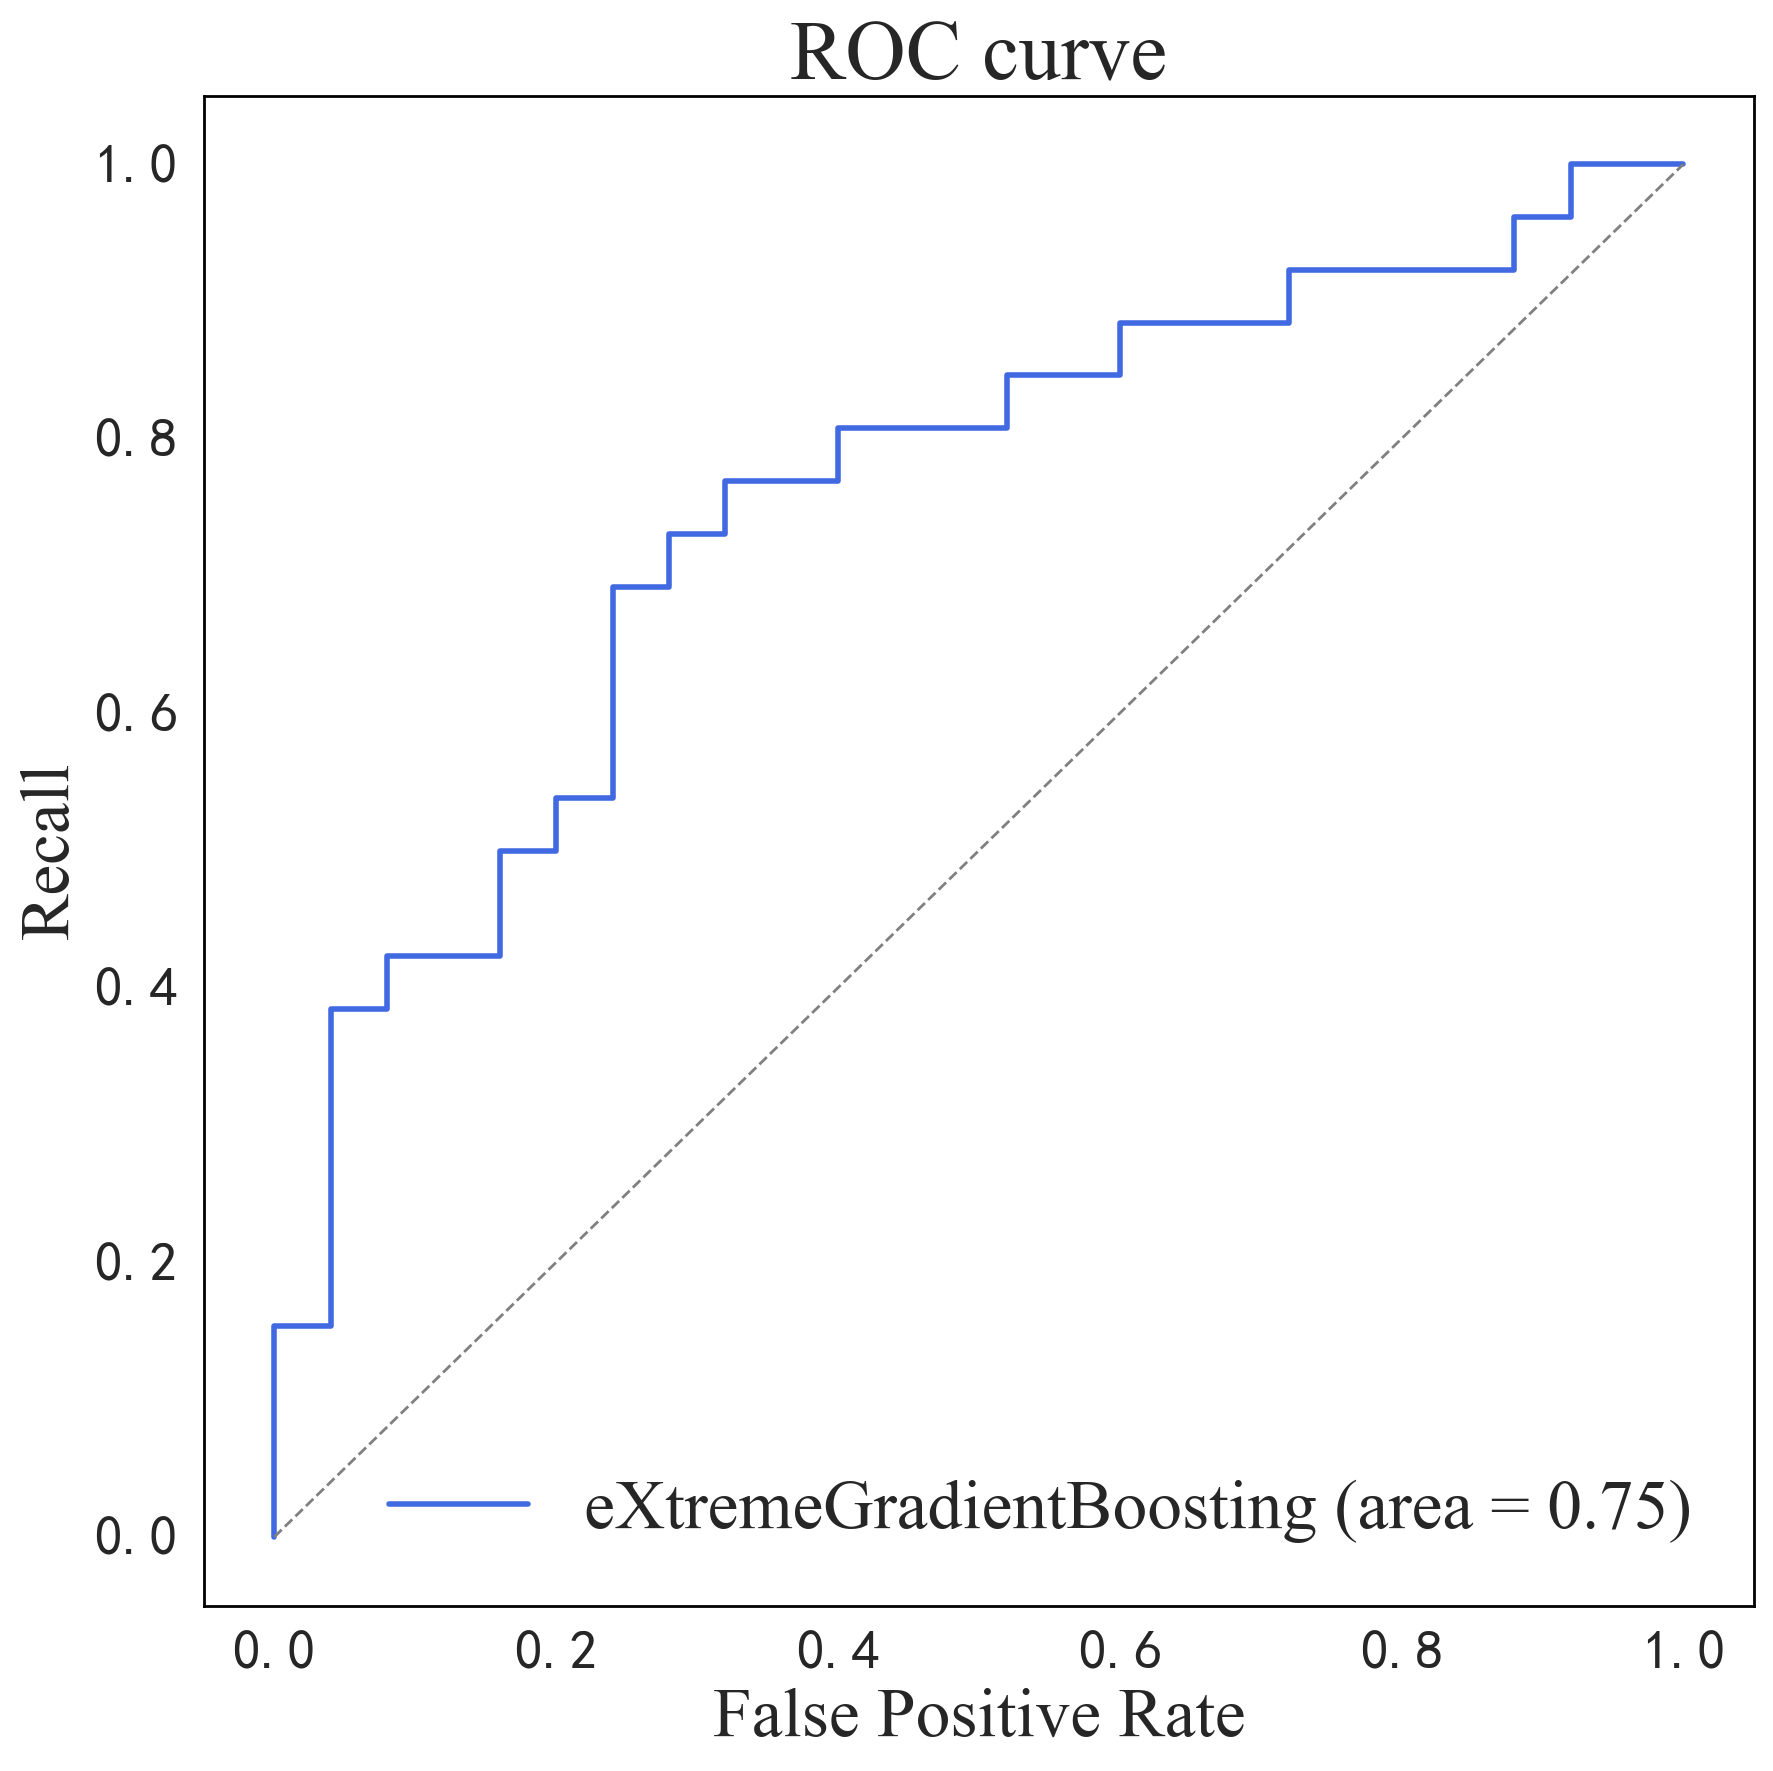

In [36]:
from sklearn.metrics import roc_curve
FPR4,recall4,thresholds4=roc_curve(Ytest,XGB.predict_proba(Xtest)[:,1],pos_label=1)


from sklearn.metrics import roc_auc_score as auc
area4=auc(Ytest,XGB.predict_proba(Xtest)[:,1])


fig=plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


plt.plot(FPR4, recall4, color='royalblue',
         label='eXtremeGradientBoosting (area = %0.2f)'% area4  ,linewidth=2.0)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--' ,linewidth=1.0)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':25
     }
plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=20)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('Recall',fontdict=font)
plt.title('ROC curve',fontdict={'family':'Times New Roman',  'weight':'normal', 'size':30})
plt.legend(loc="lower right",prop = font,facecolor='w',edgecolor='w');
#plt.grid(True,color='black',linestyle='--',alpha=0.1);
plt.savefig(r'D:/data/联川/ROC.jpg')

In [48]:
XGB.score(Xtest,Ytest),sorted([*zip(Xtrain.columns,XGB.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

(0.7058823529411765,
 [('SHPS-1', 0.07880225),
  ('CRTAC1', 0.07253816),
  ('TIMD4', 0.062624745),
  ('GDF-15', 0.061867636),
  ('RARRES2', 0.061576147),
  ('U-PAR', 0.05876068),
  ('F11', 0.04788872),
  ('CR2', 0.04663551),
  ('AXL', 0.04567136),
  ('TR', 0.045223873),
  ('MMP-2', 0.043066557),
  ('FAP', 0.03957974),
  ('PDGF subunit A', 0.03559443),
  ('REG1A', 0.034974083),
  ('t-PA', 0.031369362),
  ('DLK-1', 0.030845955),
  ('FABP4', 0.029652573),
  ('SCGB3A2', 0.026838928),
  ('PRSS2', 0.024666345),
  ('FETUB', 0.023853868),
  ('TIMP4', 0.023476753),
  ('NT-proBNP', 0.02099109),
  ('CNTN1', 0.019645432),
  ('LILRB5', 0.017434632),
  ('MMP-9', 0.016421119)])

C:\Users\C\AppData\Local\Temp\ipykernel_3248\2521470585.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


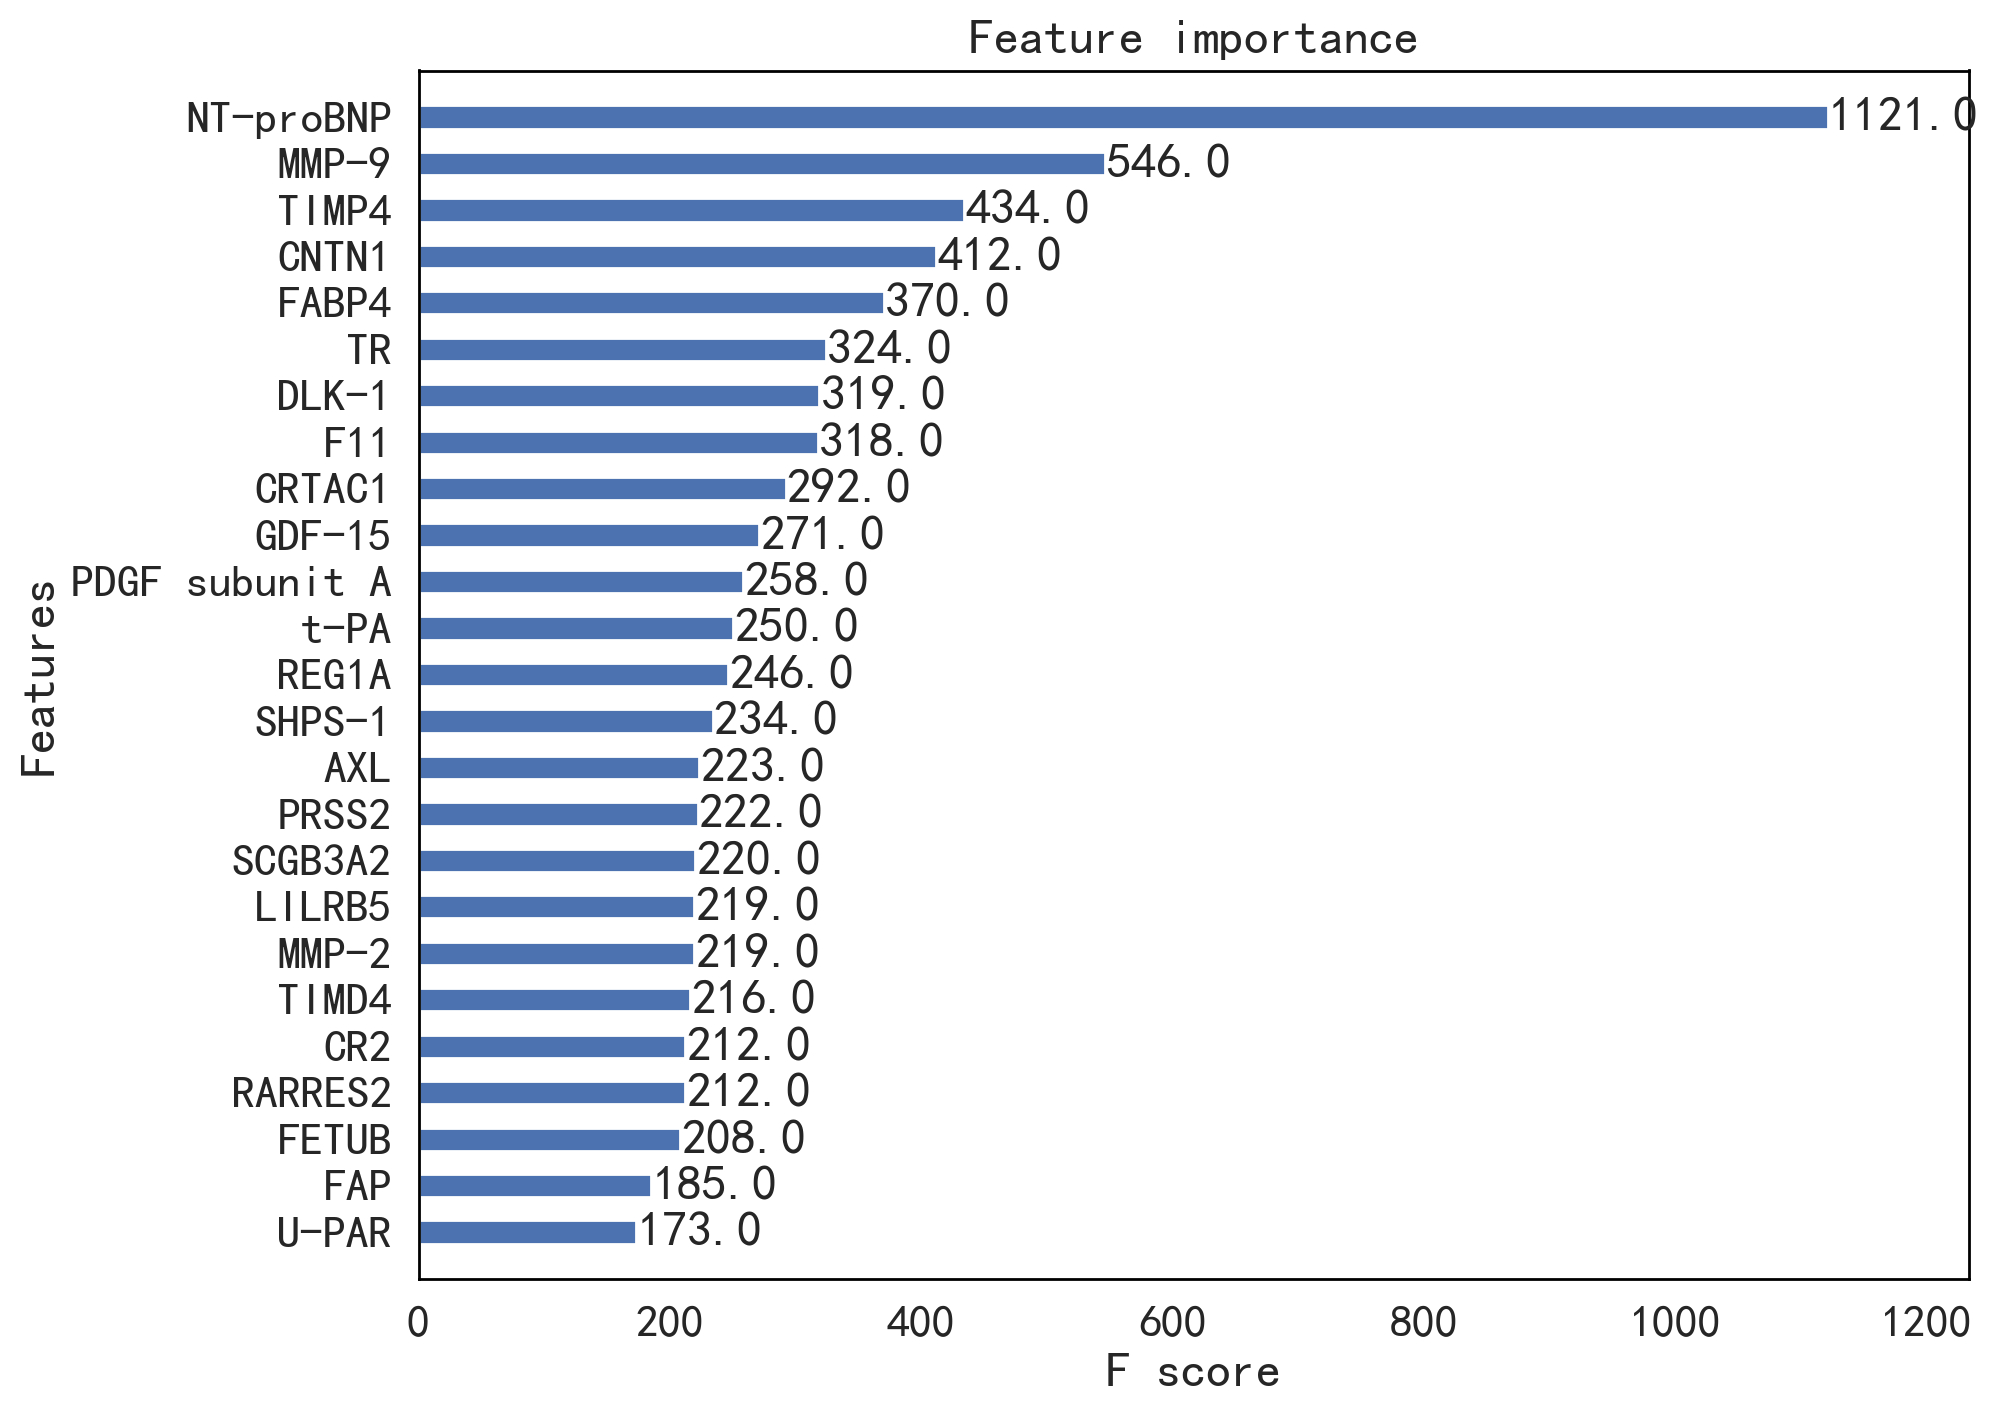

In [87]:
import xgboost as xgb
from xgboost import plot_importance
#fig,ax = plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


plot_importance(XGB,max_num_features=25,ax=ax,height=0.5);
plt.savefig(r'D:/data/联川.jpg')


In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')
# 绘制特征权重直方图

norm=plt.Normalize(XGB.feature_importances_.min(),XGB.feature_importances_.max())
norm_values=norm(XGB.feature_importances_)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':15
     }

plt.bar(x=range(0,51,1),height=sorted(XGB.feature_importances_,reverse=True)[:51],tick_label=im[:,0]
plt.ylabel('Height',fontdict=font)
plt.title('weight',{'family':'Times New Roman', 'weight':'normal', 'size':20},pad=25)
plt.xticks(rotation=90,fontsize=10)
plt.grid(False);#plt.savefig(r'D:/建模/权重.jpg')

SyntaxError: invalid syntax (4241520510.py, line 23)

In [11]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
from deap import base, creator, tools, algorithms
import math
def optimize_xgb(X, y, n_pop=5, n_gen=5, cxpb=0.5, mutpb=0.2):
    #定义目标函数，即XGBoost模型的交叉验证误差，这里的目标函数接受一个个体（即一组参数）作为输入，并返回该个体的交叉验证误差
    def eval_xgb(individual):
        #保证[0,1]
        individual[6]=math.fabs(individual[6])
        while individual[6]>1 :
            individual[6]=individual[6]-1

        params = {
            'max_depth': math.ceil(individual[0]),#取整
            'learning_rate': math.fabs(individual[1]),#取绝对值
            'n_estimators': individual[2],
            'gamma': individual[3],
            'min_child_weight': individual[4],
            'subsample': individual[5],
            'colsample_bytree': individual[6],
            'objective': 'reg:squarederror'
        }

        cv_results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=100, nfold=5, metrics='rmse', early_stopping_rounds=10, seed=0)

        return cv_results['test-rmse-mean'][len(cv_results)-1],

#定义遗传算法的参数和操作
    #这里我们使用了随机数生成器来初始化每个参数，并定义了交叉和变异操作
    creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
    creator.create('Individual', list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register('attr_max_depth', np.random.randint, 1, 10)
    toolbox.register('attr_learning_rate', np.random.uniform, 0.01, 0.3)
    toolbox.register('attr_n_estimators', np.random.randint, 50, 200)
    toolbox.register('attr_gamma', np.random.uniform, 0, 1)
    toolbox.register('attr_min_child_weight', np.random.uniform, 0.1, 10)
    toolbox.register('attr_subsample', np.random.uniform, 0.5, 1)
    toolbox.register('attr_colsample_bytree', np.random.uniform, 0.5, 1)
    toolbox.register('individual', tools.initCycle, creator.Individual, (
        toolbox.attr_max_depth,
        toolbox.attr_learning_rate,
        toolbox.attr_n_estimators,
        toolbox.attr_gamma,
        toolbox.attr_min_child_weight,
        toolbox.attr_subsample,
        toolbox.attr_colsample_bytree), n=1)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('evaluate', eval_xgb)
    toolbox.register('mate', tools.cxUniform, indpb=0.1)
    toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
    toolbox.register('select', tools.selTournament, tournsize=3)


#这里我们使用了eaSimple函数来运行遗传算法，并设置了交叉概率和变异概率。运行完毕后，我们可以得到最优的个体和对应的RMSE误差
    np.random.seed(0)
    dtrain = xgb.DMatrix(X, label=y)

    pop = toolbox.population(n=n_pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('avg', np.mean)
    stats.register('min', np.min)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=n_gen, stats=stats, halloffame=hof, verbose=True)

    best_ind = hof[0]
    best_params = {
        'max_depth': best_ind[0],
        'learning_rate': best_ind[1],
        'n_estimators': best_ind[2],
        'gamma': best_ind[3],
        'min_child_weight': best_ind[4],
        'subsample': best_ind[5],
        'colsample_bytree': best_ind[6],
        'objective': 'reg:squarederror'
    }
    best_rmse = best_ind.fitness.values[0]
    print('Best individual:', best_ind)
    print('Best RMSE:', best_rmse)

    return best_params, best_rmse

# 这里我们将整个代码封装成了一个函数optimize_xgb，它接受训练数据X和标签y，以及遗传算法的参数n_pop、n_gen、cxpb和mutpb。函数返回最优的XGBoost参数和对应的RMSE误差。

import pandas as pd
import numpy as np


#Best individual: [8.048710533322954, 0.0867211275103418, 153, 0.45615033221654855, 5.72749609379962, 0.5093949002181776, 0.8088177485379385]
# Best RMSE: 3.4154928196132395
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df = pd.read_excel(r'D:\生信\work.xlsx',header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# boston = load_boston()
# X, y = boston.data, boston.target
optimize_xgb(data,target)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 256 and the array at index 1 has size 255

In [9]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [15]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
from deap import base, creator, tools, algorithms  #在这里插入代码片
import pandas as pd
import math

In [16]:
#boston = load_boston()
boston = pd.read_excel(r'D:\生信\work.xlsx')
X= boston.drop(["Condition","Assay"],axis=1)
y = boston["Condition"]


In [17]:
def eval_xgb(individual):
	#保证[0,1]
    individual[6]=math.fabs(individual[6])
    while individual[6]>1 :
         individual[6]=individual[6]-1
    params = {
            'max_depth': math.ceil(individual[0]),#取整
            'learning_rate': math.fabs(individual[1]),#取绝对值
            'n_estimators': individual[2],
            'gamma': individual[3],
            'min_child_weight': individual[4],
            'subsample': individual[5],
            'colsample_bytree': individual[6],
            'objective': 'reg:squarederror'
        }

    cv_results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=100, nfold=5, metrics='rmse', early_stopping_rounds=10, seed=0)

    return cv_results['test-rmse-mean'][len(cv_results)-1],


In [18]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register('attr_max_depth', np.random.randint, 1, 10)
toolbox.register('attr_learning_rate', np.random.uniform, 0.01, 0.3)
toolbox.register('attr_n_estimators', np.random.randint, 50, 200)
toolbox.register('attr_gamma', np.random.uniform, 0, 1)
toolbox.register('attr_min_child_weight', np.random.uniform, 0.1, 10)
toolbox.register('attr_subsample', np.random.uniform, 0.5, 1)
toolbox.register('attr_colsample_bytree', np.random.uniform, 0.5, 1)
toolbox.register('individual', tools.initCycle, creator.Individual, (
    toolbox.attr_max_depth,
    toolbox.attr_learning_rate,
    toolbox.attr_n_estimators,
    toolbox.attr_gamma,
    toolbox.attr_min_child_weight,
    toolbox.attr_subsample,
    toolbox.attr_colsample_bytree), n=1)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', eval_xgb)
toolbox.register('mate', tools.cxUniform, indpb=0.1)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register('select', tools.selTournament, tournsize=3)


C:\Users\C\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\C\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [19]:
np.random.seed(0)
dtrain = xgb.DMatrix(X, label=y)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('avg', np.mean)
stats.register('min', np.min)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)

best_ind = hof[0]
print('Best individual:', best_ind)
print('Best RMSE:', best_ind.fitness.values[0])


[22:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:46:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:46:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:46:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:47:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:47:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[22:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[22:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are n

[0]	validation_0-error:0.00218	validation_0-logloss:0.45179	validation_1-error:0.33333	validation_1-logloss:0.64064
[1]	validation_0-error:0.00000	validation_0-logloss:0.32627	validation_1-error:0.33333	validation_1-logloss:0.63392
[2]	validation_0-error:0.00000	validation_0-logloss:0.23314	validation_1-error:0.35294	validation_1-logloss:0.63541
[3]	validation_0-error:0.00000	validation_0-logloss:0.17152	validation_1-error:0.35294	validation_1-logloss:0.66112
[4]	validation_0-error:0.00000	validation_0-logloss:0.13272	validation_1-error:0.37255	validation_1-logloss:0.66332
[5]	validation_0-error:0.00000	validation_0-logloss:0.09969	validation_1-error:0.33333	validation_1-logloss:0.67278
[6]	validation_0-error:0.00000	validation_0-logloss:0.07596	validation_1-error:0.35294	validation_1-logloss:0.68674
[7]	validation_0-error:0.00000	validation_0-logloss:0.05970	validation_1-error:0.31373	validation_1-logloss:0.67088
[8]	validation_0-error:0.00000	validation_0-logloss:0.04658	validation_1

C:\Users\C\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-error:0.00000	validation_0-logloss:0.00055	validation_1-error:0.29412	validation_1-logloss:0.85808
[62]	validation_0-error:0.00000	validation_0-logloss:0.00053	validation_1-error:0.29412	validation_1-logloss:0.85620
[63]	validation_0-error:0.00000	validation_0-logloss:0.00052	validation_1-error:0.29412	validation_1-logloss:0.85888
[64]	validation_0-error:0.00000	validation_0-logloss:0.00051	validation_1-error:0.29412	validation_1-logloss:0.85674
[65]	validation_0-error:0.00000	validation_0-logloss:0.00050	validation_1-error:0.31373	validation_1-logloss:0.86018
[66]	validation_0-error:0.00000	validation_0-logloss:0.00048	validation_1-error:0.31373	validation_1-logloss:0.86120
[67]	validation_0-error:0.00000	validation_0-logloss:0.00047	validation_1-error:0.31373	validation_1-logloss:0.86817
[68]	validation_0-error:0.00000	validation_0-logloss:0.00046	validation_1-error:0.31373	validation_1-logloss:0.87004
[69]	validation_0-error:0.00000	validation_0-logloss:0.00045	val

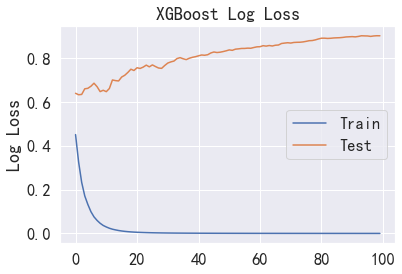

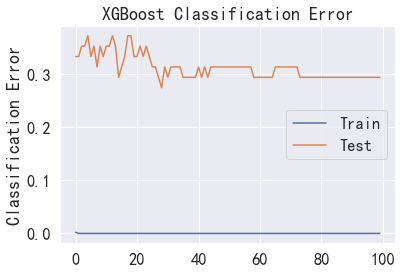

In [44]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = pd.read_excel(r'D:\生信\work.xlsx')
# split data into X and y
X= dataset.drop(["Condition","Assay"],axis=1)
Y = dataset["Condition"]
# split data into train and test sets

X = dataset[['NT-proBNP', 'MMP-9', 'TIMP4', 'CNTN1', 'FABP4', 'TR', 'GDF-15',
       'DLK-1', 'AXL', 'MMP-2', 'U-PAR', 'SHPS-1', 't-PA', 'SCGB3A2',
       'RARRES2', 'PDGF subunit A', 'LILRB5', 'F11', 'REG1A', 'PRSS2', 'CR2',
       'FAP', 'TIMD4', 'CRTAC1', 'FETUB'
]]
Y = dataset["Condition"]
 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                Y,
                                               test_size=0.1,
                                                random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier(max_depth=13,reg_lambda=0.1,objective="binary:logistic",min_child_weight=0.0001)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()